Projeto de Análise Preditiva de Inadimplência
-


-  Objetivo
O projeto tem como finalidade prever a inadimplência de clientes no momento de solicitação de um cartão de crédito. O desafio é identificar, com base em informações históricas e cadastrais, quais clientes terão maior probabilidade de não pagar sua dívida, ajudando a fintech a tomar melhores decisões de concessão de crédito.

        Dados Utilizados:

Trabalhamos com três datasets principais:
- application_train_dataset.csv - Base principal com dados demográficos, socioeconômicos e comportamentais dos clientes.
- customers_target_and_decision_dataset.csv - Contém a variável-alvo (default, que indica inadimplência) e informações sobre a decisão da concessão de crédito.
- unstructured_dataset.csv - Base com informações textuais ou não estruturadas que podem enriquecer a análise.

Os datasets foram unidos e estruturados no dataframe principal chamado df_unique.

        Credit_card_initial_line:
- O limite inicial do cartão de crédito que fornecemos ao cliente

        Default:
- Se o cliente pagou (0) ou deu calote (1) no nosso cartão de crédito. Este é o alvo (variável target)	

        Age:
- idade do cliente	

        Amt_active_loan:
- valor do saldo em empréstimos de outras instituições na data da solicitação	

        Channel:
- canal usado para a solicitação	

        Ext_score_1:
- pontuação de crédito externa 1	

        Ext_score_2:
- pontuação de crédito externa 2	

        Ext_score_3:
- pontuação de crédito externa 3	

        Ext_score_4:
- pontuação de crédito externa 4	

        Flag_document_A:
- se o documento A foi fornecido na solicitação

        Gender:
- gênero do cliente	

        Ids:
- ID único da pessoa	

        Income:
- renda anual do cliente	

        Occupation_type:
- ocupação do cliente	

        Score_checks:
- número de consultas de crédito feitas para o cliente no ano anterior	

        Score_date:
- data em que o cliente solicitou o cartão de crédito	

        Start_hour:
- horário truncado em que a solicitação foi recebida	


        Payment:
- valor pago naquele mês	

        Date:
- data de pagamento	

        Credit_line:
- limite de crédito naquele mês	

        Spends:
- valor gasto naquele mês	


In [ ]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from scipy.stats import ks_2samp
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import shapiro, mannwhitneyu
from scipy.stats import brunnermunzel
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

In [9]:
# Carregando o dataset

df_train = pd.read_csv('../data/application_train_dataset.csv', sep=',', index_col=0)

In [10]:
df_train.head()

,age,amt_active_loan,channel,ext_score_1,ext_score_2,ext_score_3,ext_score_4,flag_document_A,gender,ids,income,occupation_type,score_checks,score_date,start_hour
0,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0
1,47,NaN,NCqL3QBx0pscDnx3ixKwXg==,470.0,e4NYDor1NOw6XKGE60AWFw==,+2hzpeP1RWr8PEvL1WTUdw==,76.095384,False,m,ee6a5953-cd50-a004-11d0-58ef2787ffcb,69583.23,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,NaN,2017-01-20,21.0
2,23,0.0,NCqL3QBx0pscDnx3ixKwXg==,533.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,55.010052,False,f,4776fd82-f728-d66b-6fb8-41a8f80a3cd3,79681.63,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,7.0,2017-01-15,15.0
3,42,NaN,NCqL3QBx0pscDnx3ixKwXg==,522.0,fyrlulOiZ+5hoFqLa6UbDQ==,NLvAOzzmJba/0zolQnWF5Q==,70.809549,True,f,70e34497-7bdd-32e2-b8e0-3ffb09265f4f,44753.20,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,NaN,2017-01-25,19.0
4,46,47720.0,NCqL3QBx0pscDnx3ixKwXg==,324.0,fyrlulOiZ+5hoFqLa6UbDQ==,Fv28Bz0YRTVAT5kl1bAV6g==,71.497943,True,f,46f536d5-9d1a-ce94-b67b-76e99dd48e1d,191517.40,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,20.0,2017-01-13,11.0


In [11]:
df_train.dtypes

age                  int64
amt_active_loan    float64
channel             object
ext_score_1        float64
ext_score_2         object
ext_score_3         object
ext_score_4        float64
flag_document_A     object
gender              object
ids                 object
income             float64
occupation_type     object
score_checks       float64
score_date          object
start_hour         float64
dtype: object

In [12]:
df_train.isnull().sum()

age                    0
amt_active_loan    23652
channel              915
ext_score_1          915
ext_score_2          915
ext_score_3          915
ext_score_4            0
flag_document_A     7680
gender              8503
ids                    0
income               915
occupation_type     5706
score_checks       19697
score_date             0
start_hour             0
dtype: int64

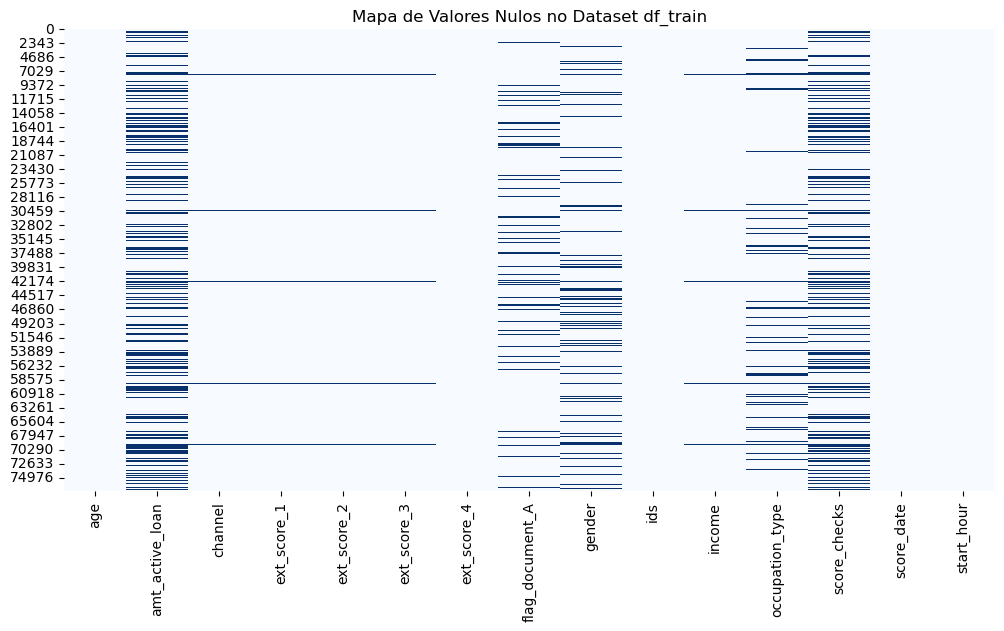

In [14]:
# Heatmap dos valores nulos (com seaborn)

plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='Blues')
plt.title('Mapa de Valores Nulos no Dataset df_train')
plt.show()


ANÁLISE UNIVARIADA DO DATASET DT_TRAIN:

Análise da variável AGE:

count    77294.000000
mean        40.442906
std         12.645901
min         18.000000
25%         31.000000
50%         39.000000
75%         49.000000
max         99.000000
Name: age, dtype: float64
Valores nulos em 'age': 0


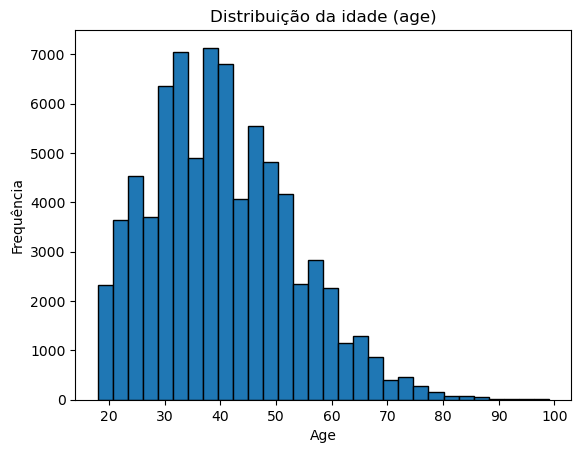

In [15]:
print(df_train['age'].describe())
print(f"Valores nulos em 'age': {df_train['age'].isnull().sum()}")

plt.hist(df_train['age'].dropna(), bins=30, edgecolor='black')
plt.title('Distribuição da idade (age)')
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.show()



Insights:
-  A distribuição da idade é assimétrica à direita (distribuição enviesada à esquerda), com a maior parte das idades concentradas entre 30 e 45 anos.
- A população analisada é predominantemente adulta jovem e de meia-idade, com poucos indivíduos com mais de 60 anos.

Análise da variável AMT_ACTIVE_LOAN:

count     53642.000000
mean       6852.896611
std        7366.334338
min           0.000000
25%        2000.000000
50%        5140.000000
75%        9375.000000
max      182400.000000
Name: amt_active_loan, dtype: float64
Valores nulos em 'amt_active_loan': 23652


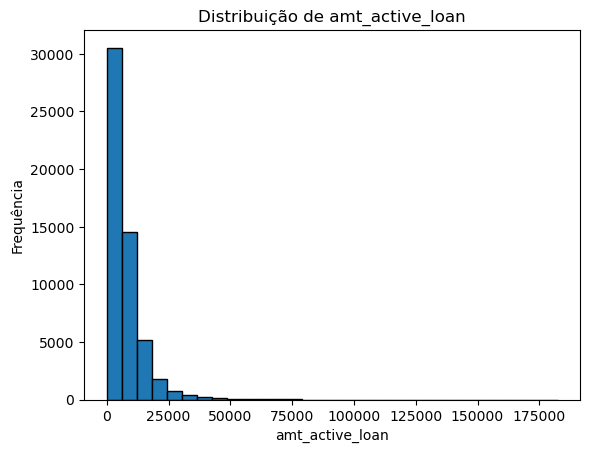

In [16]:
print(df_train['amt_active_loan'].describe())
print(f"Valores nulos em 'amt_active_loan': {df_train['amt_active_loan'].isnull().sum()}")

plt.hist(df_train['amt_active_loan'].dropna(), bins=30, edgecolor='black')
plt.title('Distribuição de amt_active_loan')
plt.xlabel('amt_active_loan')
plt.ylabel('Frequência')
plt.show()


Insights:
- Distribuição fortemente assimétrica à direita, com a maioria dos valores concentrados próximos de zero.
- A maioria dos clientes tem valores modestos de empréstimos ativos, enquanto grandes empréstimos são raros e podem ser outliers.

Análise da variável EXT_SCORE_1

count    76379.000000
mean       491.148653
std        110.767093
min         64.000000
25%        422.000000
50%        481.000000
75%        540.000000
max       1000.000000
Name: ext_score_1, dtype: float64
Valores nulos em 'ext_score_1': 915


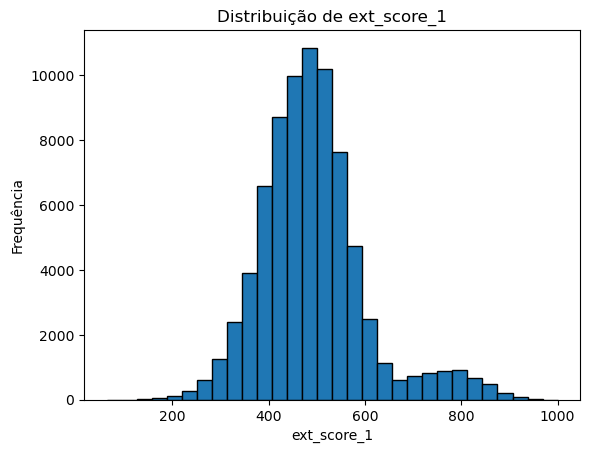

In [17]:
print(df_train['ext_score_1'].describe())
print(f"Valores nulos em 'ext_score_1': {df_train['ext_score_1'].isnull().sum()}")

plt.hist(df_train['ext_score_1'].dropna(), bins=30, edgecolor='black')
plt.title('Distribuição de ext_score_1')
plt.xlabel('ext_score_1')
plt.ylabel('Frequência')
plt.show()



Insights:
- A curva normal, com leve cauda à direita (possivelmente indicando um subgrupo com score mais alto).
- O score é bem distribuído entre os indivíduos, sugerindo que pode ser uma variável útil para modelagem, com bom poder discriminativo.

Análise da variável INCOME:

count    7.637900e+04
mean     7.155790e+04
std      5.223873e+04
min      4.699360e+03
25%      4.432425e+04
50%      6.135734e+04
75%      8.622789e+04
max      5.059731e+06
Name: income, dtype: float64
Valores nulos em 'income': 915


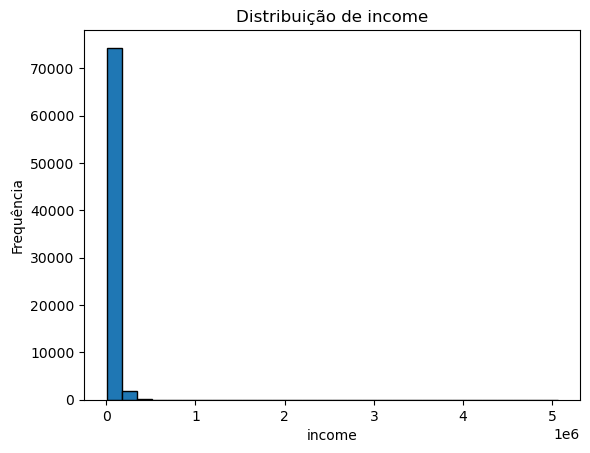

In [18]:
print(df_train['income'].describe())
print(f"Valores nulos em 'income': {df_train['income'].isnull().sum()}")

plt.hist(df_train['income'].dropna(), bins=30, edgecolor='black')
plt.title('Distribuição de income')
plt.xlabel('income')
plt.ylabel('Frequência')
plt.show()


Insights:
- Extremamente assimétrica à direita, com concentração maciça de indivíduos com rendas muito baixas.
- Há forte presença de outliers com renda muito alta, e a maioria da população tem baixa renda. 



Análise da variável SCORE_CHECKS:

count    57597.000000
mean        11.050541
std          4.588293
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         45.000000
Name: score_checks, dtype: float64
Valores nulos em 'score_checks': 19697


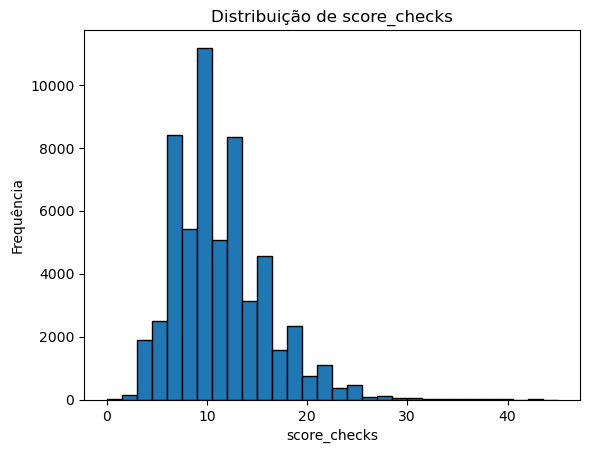

In [19]:
print(df_train['score_checks'].describe())
print(f"Valores nulos em 'score_checks': {df_train['score_checks'].isnull().sum()}")

plt.hist(df_train['score_checks'].dropna(), bins=30, edgecolor='black')
plt.title('Distribuição de score_checks')
plt.xlabel('score_checks')
plt.ylabel('Frequência')
plt.show()



Insigths:
- A distribuição é assimétrica com cauda à direita (positivamente enviesada), o que indica que a maioria dos valores de score_checks está concentrada entre 5 e 15.

Análise da variável START_HOUR:

count    77294.000000
mean        13.331953
std          4.128750
min          0.000000
25%         11.000000
50%         13.000000
75%         16.000000
max         23.000000
Name: start_hour, dtype: float64
Valores nulos em 'start_hour': 0


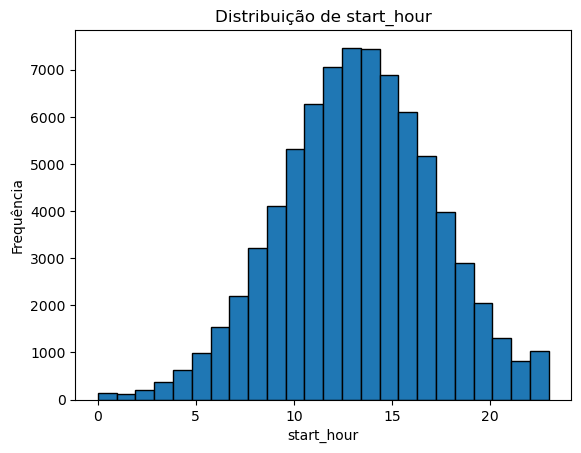

In [20]:
print(df_train['start_hour'].describe())
print(f"Valores nulos em 'start_hour': {df_train['start_hour'].isnull().sum()}")

plt.hist(df_train['start_hour'].dropna(), bins=24, edgecolor='black')
plt.title('Distribuição de start_hour')
plt.xlabel('start_hour')
plt.ylabel('Frequência')
plt.show()



Insights:
- A forma da distribuição é simétrica e lembra uma curva normal, centrada por volta das 13h–14h.
- O horário com maior frequência é próximo de 13h, com mais de 7.000 ocorrências.
- Poucas ocorrências são registradas entre meia-noite e 6h da manhã, bem como após as 21h.


Análise da variável CHANNEL:

Análise da variável categórica: channel
channel
NCqL3QBx0pscDnx3ixKwXg==    76379
NaN                           915
Name: count, dtype: int64
Valores nulos em 'channel': 915


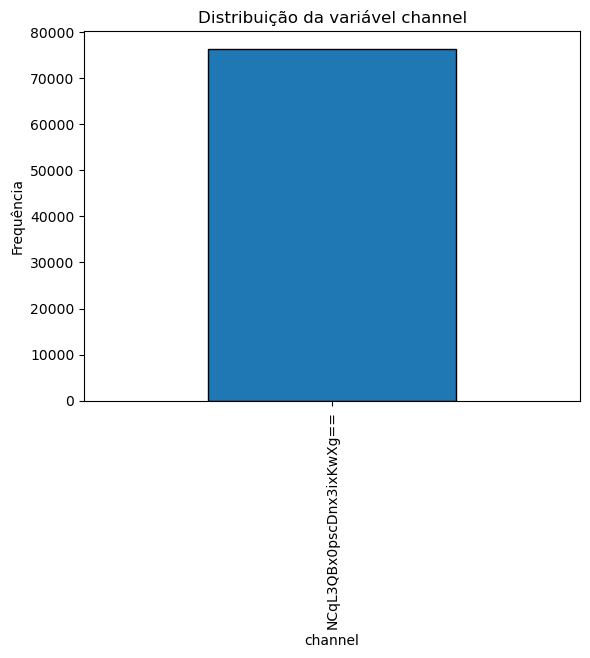

In [21]:
col = 'channel'
print(f"Análise da variável categórica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribuição da variável {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.show()



Isights:
- Temos apasrentemente um canal com frequência, aproximadamente 76.000.

Análise da variável EXT_SCORE_2:

Análise da variável categórica: ext_score_2
ext_score_2
DGCQep2AE5QRkNCshIAlFQ==    25118
1Rk8w4Ucd5yR3KcqZzLdow==    19505
fyrlulOiZ+5hoFqLa6UbDQ==    12799
8k8UDR4Yx0qasAjkGrUZLw==    11109
4DLlLW62jReXaqbPaHp1vQ==     5064
e4NYDor1NOw6XKGE60AWFw==     2296
NaN                           915
smzX0nxh5QlePvtVf6EAeg==      488
Name: count, dtype: int64
Valores nulos em 'ext_score_2': 915


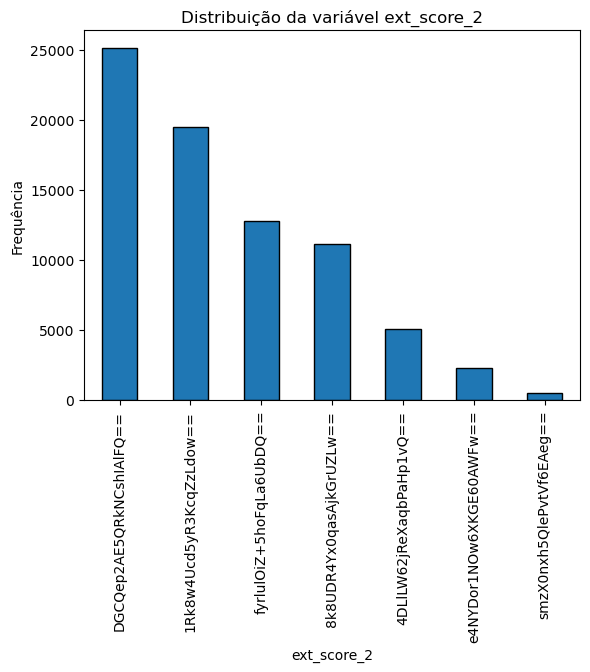

In [22]:
col = 'ext_score_2'
print(f"Análise da variável categórica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribuição da variável {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.show()


Insights:
- A frequência dos valores é decrescente, com o valor mais comum (DGCep2AE50RkNCshaIFQ==) aparecendo mais de 25.000 vezes, e o menos comum aparecendo pouco acima de 1.000.

Análise da variável EXT_SCORE_3:

Análise da variável categórica: ext_score_3
ext_score_3
O4i7FxcROACMVTCgI0WXuA==    6234
tQUTfUyeuGkhRotd+6WjVg==    5709
pAzpxkhjPsjWldgSX21+zg==    5120
w1miZqhB5+RSamEQJa0rqg==    4472
RO7MTL+j4PH2gNzbhNTq/A==    4213
LCak332j+TYFqHC3NDwiqg==    4146
vJyc9xom9v7hwFMPTIpmKw==    3909
7h+tk4z7O9brtBSe1rNjxA==    3817
wjdj2vxjWoDsEIk0l09ynw==    3680
Fv28Bz0YRTVAT5kl1bAV6g==    3578
/tdlnWjXoZ3OjdtBXzdOJQ==    3382
rJZgTmANW3PjOCQLCcp4iQ==    3323
dWJRASUFMejk3AHZ1p1Gkg==    2822
dCm9hFKfdRm7ej3jW+gyxw==    2461
55UK234RR1d7HIWJjmq9tw==    2188
ky19q4V1ZqgL3jnHX0wKDw==    2040
mX2VRRG38RPiHX+MfjefRw==    1997
YLGMUI9hObSh6wD/xfanGg==    1890
emS9xH8CLoRNie2uSmaDAQ==    1789
NLvAOzzmJba/0zolQnWF5Q==    1761
wkeCdGeu5sEv4/fjwR0aDg==    1252
OlDYtdljgSSYM/M1L2CRaQ==    1136
6J1ZMTzN5GKHXnhM4J1JbA==    1008
NaN                          915
osCzpM4hJrxugqWWuZmMWw==     911
tHpS8e9F8d9zg3iOQM9tsA==     757
+2hzpeP1RWr8PEvL1WTUdw==     661
d/7Hedyz7ovK9Pn1CYN4+A==     532
IOVu8au3ISbo6+zmfnYw

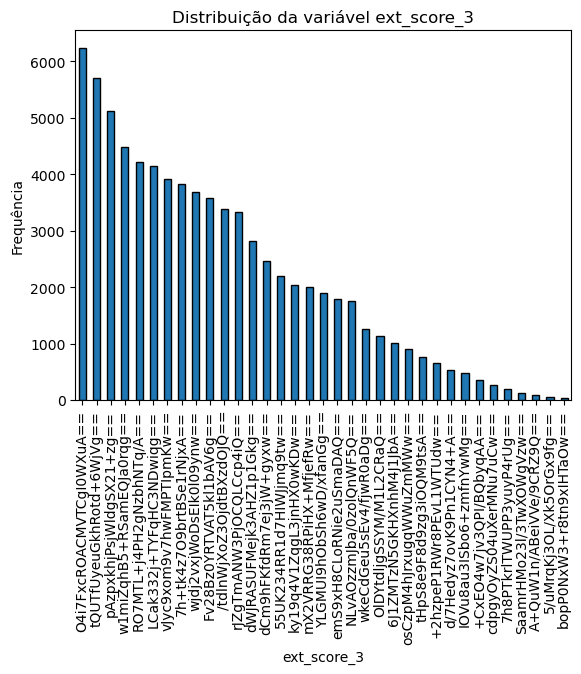

In [23]:
col = 'ext_score_3'
print(f"Análise da variável categórica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribuição da variável {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.show()


Inghts:
- Os valores são decrescente com distribuição simétrica dos valores.

Análise da variável EXT_SCORE_4:

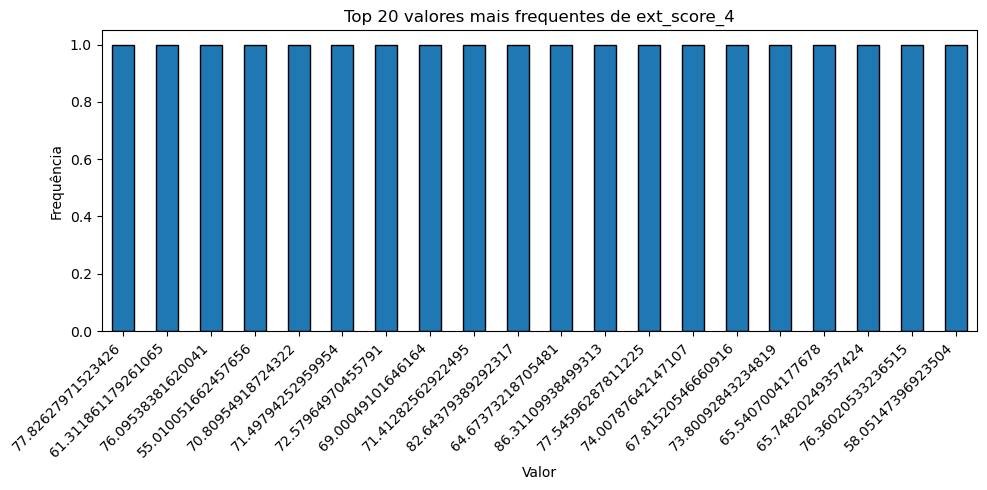

In [24]:
top_categorias = df_train['ext_score_4'].value_counts().head(20)

plt.figure(figsize=(10, 5))
top_categorias.plot(kind='bar', edgecolor='black')
plt.title('Top 20 valores mais frequentes de ext_score_4')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Insights:
- Todos os valores mostrados têm frequência igual a 1, o que indica que esses valores aparecem com frequência semelhante, sem dominância de um único valor.

Análise da variável FLAG_DOCUMENT_A:

Análise da variável categórica: flag_document_A
flag_document_A
True     42905
False    26709
NaN       7680
Name: count, dtype: int64
Valores nulos em 'flag_document_A': 7680


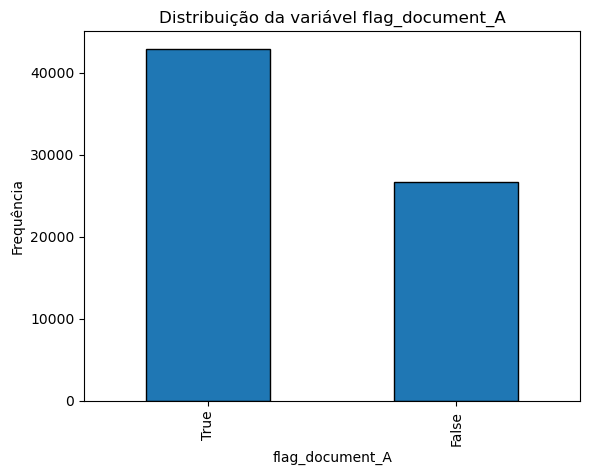

In [25]:
col = 'flag_document_A'
print(f"Análise da variável categórica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribuição da variável {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.show()

Insights:
- True aparece com maior frequência, com aproximadamente 43.000 ocorrências. False aparece cerca de 27.000 vezes.
- A variável tem uma distribuição relativamente equilibrada, embora com prevalência do valor True.

Análise da variável GENDER:

Análise da variável categórica: gender
gender
m      46551
f      22240
NaN     8503
Name: count, dtype: int64
Valores nulos em 'gender': 8503


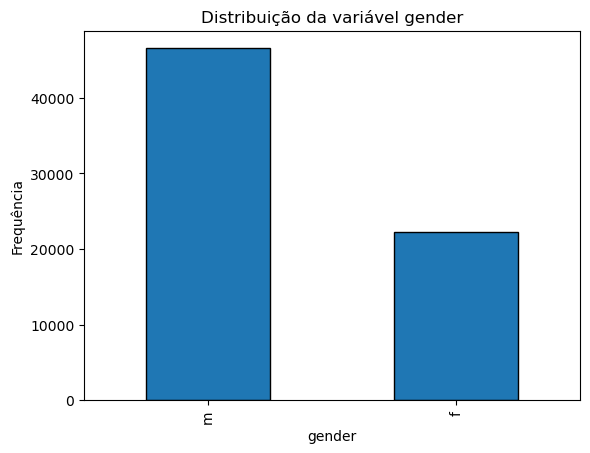

In [26]:
df_train['gender'].unique()  # Verifique os valores únicos
df_train['gender'] = df_train['gender'].replace({'E': 'M'})  # Correção manual, se aplicável


col = 'gender'
print(f"Análise da variável categórica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribuição da variável {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.show()

Insights:
- A distribuição entre os gêneros é claramente desigual.
- Aproximadamente 2/3 dos registros são do gênero representado por  'M', e 1/3 são do gênero f.
- Há um desequilíbrio de gênero na base, o que pode impactar análises ou modelos preditivos que levem essa variável em conta.

Análise da variável OCCUPATION_TYPE:

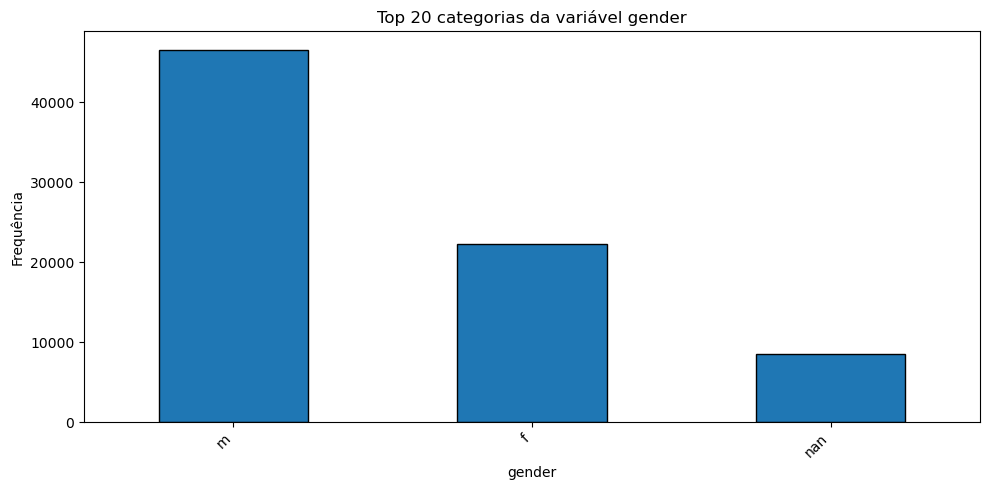

In [27]:
top_ocupacoes = df_train[col].value_counts(dropna=False).head(20)

plt.figure(figsize=(10, 5))
top_ocupacoes.plot(kind='bar', edgecolor='black')
plt.title(f'Top 20 categorias da variável {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Insights:
- Observa-se que os dados estão relativamentes iguais, sendo que os dados mais frequentes sãos os dados nulos (nan).

Análise da variável SCORE_DATE:

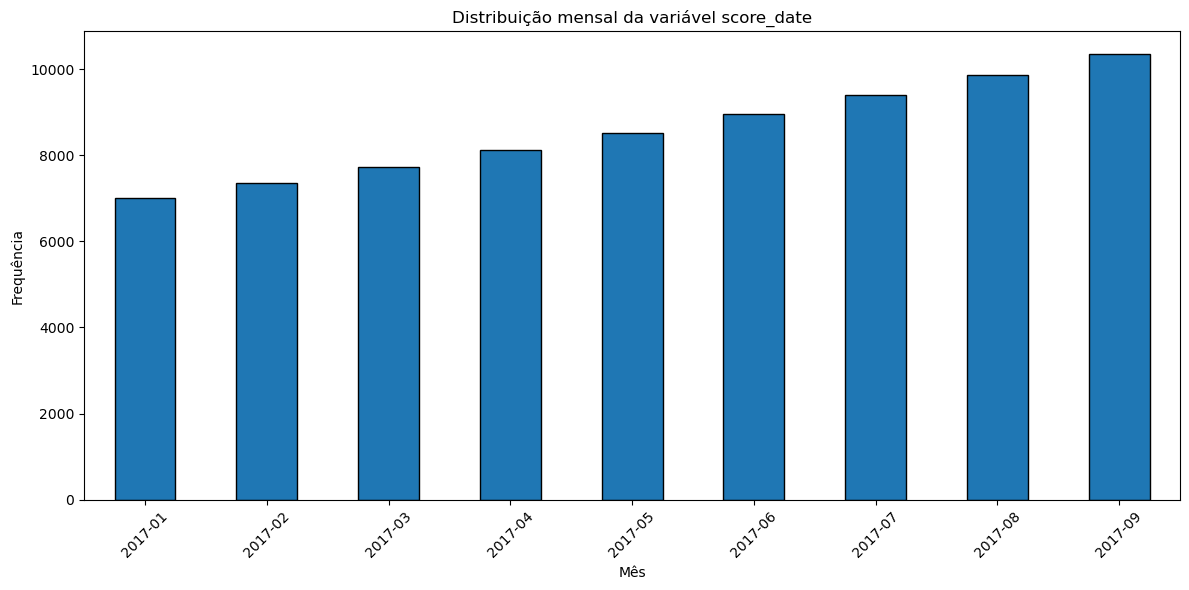

In [28]:
# Supondo que a coluna 'score_date' esteja no formato de string e precise ser convertida
df_train['score_date'] = pd.to_datetime(df_train['score_date'], errors='coerce')

# Agrupar por mês
df_monthly = df_train['score_date'].dt.to_period('M').value_counts().sort_index()

# Plotagem
df_monthly.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title('Distribuição mensal da variável score_date')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:
- A frequência de registros aumenta consistentemente de janeiro a setembro.
- Em setembro de 2017, temos o pico da distribuição, com mais de 8.500 ocorrências.
- A partir de outubro, há uma queda brusca no número de registros.

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [31]:
df_target = pd.read_csv('../data/customers_target_and_decision_dataset.csv', sep=',', index_col=0)


In [32]:
df_target.head()

,ids,default,credit_card_initial_line
0,648384b9-f932-d221-45d7-85d0aa0a412c,False,1300.0
1,ee6a5953-cd50-a004-11d0-58ef2787ffcb,True,1000.0
2,4776fd82-f728-d66b-6fb8-41a8f80a3cd3,False,1700.0
3,70e34497-7bdd-32e2-b8e0-3ffb09265f4f,False,1400.0
4,46f536d5-9d1a-ce94-b67b-76e99dd48e1d,False,2200.0


In [33]:
df_target.dtypes

ids                          object
default                      object
credit_card_initial_line    float64
dtype: object

In [34]:
df_target.isnull().sum()

ids                             0
default                     26219
credit_card_initial_line    20706
dtype: int64

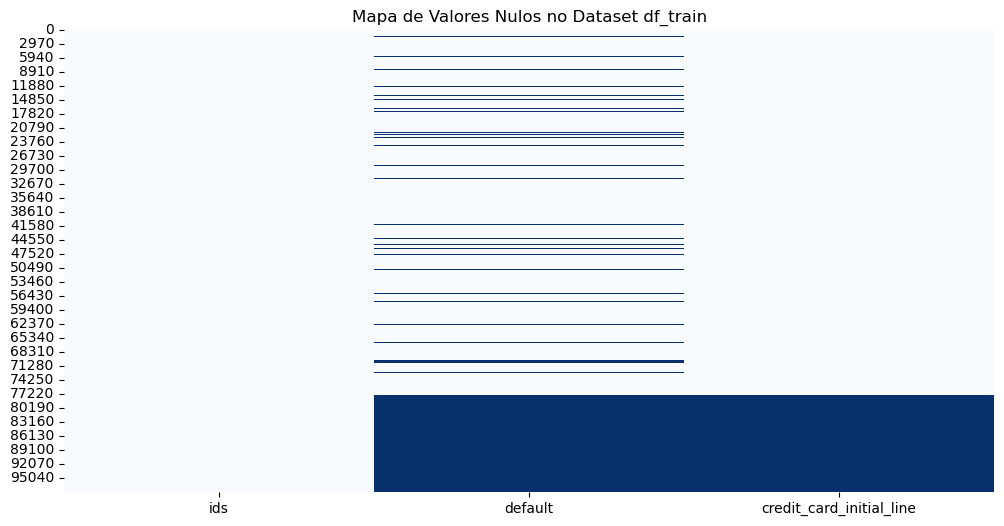

In [35]:
# Heatmap dos valores nulos (com seaborn)
plt.figure(figsize=(12, 6))
sns.heatmap(df_target.isnull(), cbar=False, cmap='Blues')
plt.title('Mapa de Valores Nulos no Dataset df_train')
plt.show()

In [36]:
# Removendo os dados nulos da variavel DEFAULT

df_target = df_target[df_target['default'].notnull()]


ANÁLISE UNIVARIADA DO DATASET DT_TARGET:

Análise da variável DEFAULT:

Análise da variável: default
default
False    60518
True     11263
Name: count, dtype: int64
Valores nulos em 'default': 0


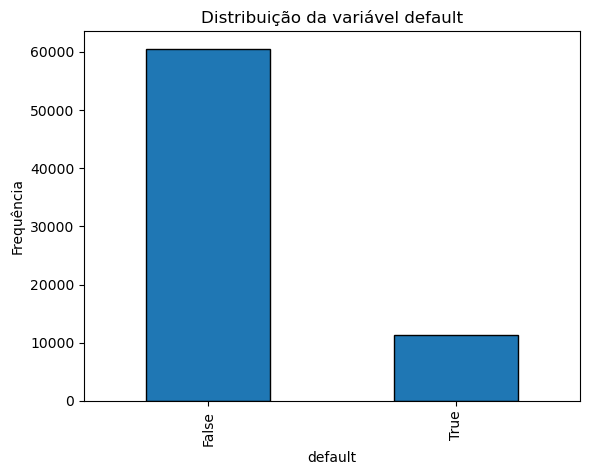

In [37]:
col = 'default'
print(f"Análise da variável: {col}")
print(df_target[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_target[col].isnull().sum()}")

df_target[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribuição da variável {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.show()


Insights:
- A maioria dos clientes não entrou em default (valor False).
- Aproximadamente 85% dos registros são de clientes adimplentes.
- Apenas 15% dos registros referem-se a clientes inadimplentes.

Análise da variável CREDIT_CARD_INITIAL_LINE:

Análise da variável: credit_card_initial_line
count    71781.000000
mean      1413.015979
std        608.505118
min        500.000000
25%        900.000000
50%       1300.000000
75%       1800.000000
max       3400.000000
Name: credit_card_initial_line, dtype: float64
Valores nulos em 'credit_card_initial_line': 0


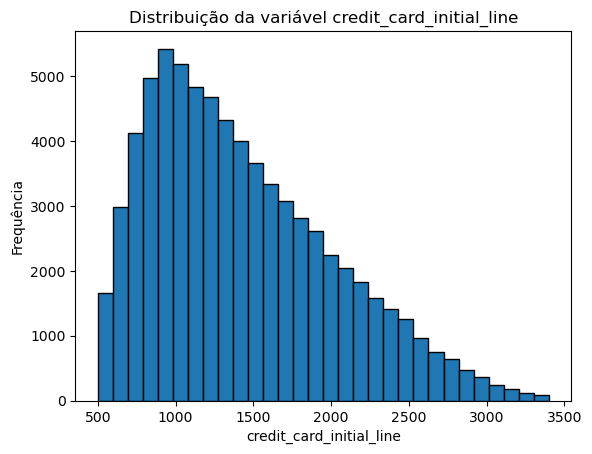

In [38]:
col = 'credit_card_initial_line'
print(f"Análise da variável: {col}")
print(df_target[col].describe())
print(f"Valores nulos em '{col}': {df_target[col].isnull().sum()}")

plt.hist(df_target[col].dropna(), bins=30, edgecolor='black')
plt.title(f'Distribuição da variável {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.show()


Insights:
- A distribuição tem um formato de cauda longa à direita, indicando que: A maioria dos clientes recebe limites iniciais mais baixos (entre R$ 500 e R$ 1.500) e um número progressivamente menor de clientes recebe limites mais altos, chegando até R$ 3.400.
- A concessão de limites acima de R$ 2.500 é rara, o que pode indicar uma política mais conservadora de crédito.

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [39]:
df_unstructured = pd.read_csv('../data/unstructured_dataset.csv', index_col=0)

In [40]:
df_unstructured.head()

,payment,date,credit_line,spends
ids,,,,
0003da40-123b-031a-63b3-f7c9f18516ab,695.34,2016-11-30,7648.0,504.76
0003da40-123b-031a-63b3-f7c9f18516ab,0.00,2016-12-31,8660.0,1843.08
0003da40-123b-031a-63b3-f7c9f18516ab,0.00,2017-01-31,8050.0,631.99
0003da40-123b-031a-63b3-f7c9f18516ab,13.04,2017-02-28,8738.0,13.04
0003da40-123b-031a-63b3-f7c9f18516ab,6285.47,2017-03-31,8585.0,6285.47


In [41]:
df_unstructured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486498 entries, 0003da40-123b-031a-63b3-f7c9f18516ab to ffffcf3c-f4e7-1401-79ed-e8a56f1e8a40
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   payment      486498 non-null  float64
 1   date         486498 non-null  object 
 2   credit_line  486498 non-null  float64
 3   spends       486498 non-null  float64
dtypes: float64(3), object(1)
memory usage: 18.6+ MB


In [42]:
df_unstructured.isnull().sum()

payment        0
date           0
credit_line    0
spends         0
dtype: int64

ANÁLISE UNIVARIADA DO DATASET DT_UNSTRUCTURED:

Análise da variável PAYMENT:

Análise da variável: payment
count    486498.000000
mean       1103.868649
std        1569.278534
min           0.000000
25%          75.360000
50%         499.695000
75%        1499.667500
max       40426.780000
Name: payment, dtype: float64


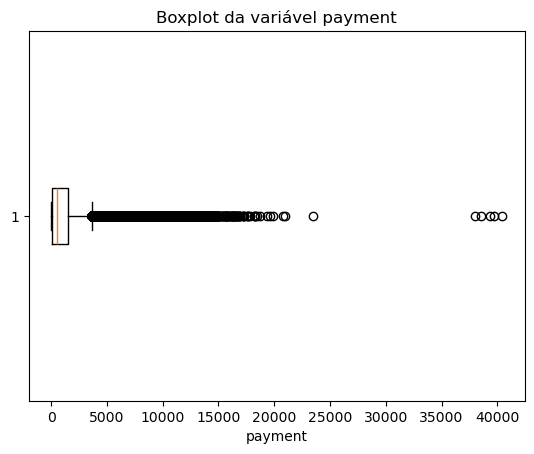

In [43]:
import matplotlib.pyplot as plt

col = 'payment'
print(f"Análise da variável: {col}")
print(df_unstructured[col].describe())

plt.boxplot(df_unstructured[col], vert=False)
plt.title(f'Boxplot da variável {col}')
plt.xlabel(col)
plt.show()


Insights:
- A maior parte dos pagamentos está concentrada em valores relativamente baixos, com a mediana próxima de R$ 500 a R$ 1.000.
- Há uma quantidade significativa de pontos fora do limite superior, indicando clientes que realizaram pagamentos muito altos comparado à maioria.
- A variável apresenta uma distribuição altamente enviesada à direita.

Análise da variável DATE:

Análise da variável: date
date
2016-02-29      319
2016-03-31      956
2016-04-30     1971
2016-05-31     3378
2016-06-30     5077
2016-07-31     7235
2016-08-31     9834
2016-09-30    13229
2016-10-31    17639
2016-11-30    22247
2016-12-31    27058
2017-01-31    31907
2017-02-28    36537
2017-03-31    41110
2017-04-30    41005
2017-05-31    40448
2017-06-30    39428
2017-07-31    37670
2017-08-31    35336
2017-09-30    32258
2017-10-31    27637
2017-11-30    14219
Name: count, dtype: int64


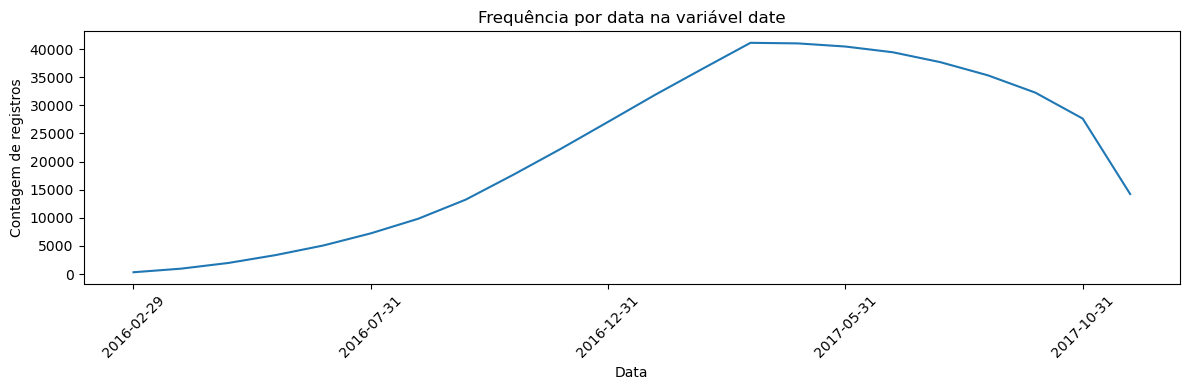

In [44]:
col = 'date'
print(f"Análise da variável: {col}")
print(df_unstructured[col].value_counts().sort_index())

df_unstructured[col].value_counts().sort_index().plot(kind='line', figsize=(12, 4))
plt.title(f'Frequência por data na variável {col}')
plt.xlabel('Data')
plt.ylabel('Contagem de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:
- Entre o início de 2016 até aproximadamente março de 2017, há uma forte tendência de crescimento no número de registros — possivelmente por aumento da base de clientes ou da operação.
- O pico de frequência é atingido por volta de março/abril de 2017, com cerca de 40.000 registros.
- A partir de meados de 2017, há uma queda contínua, com um declínio mais brusco nos últimos dois meses da série (outubro/novembro de 2017).

Análise da variável CREDIT_LINE:

Análise da variável: credit_line
count    486498.000000
mean       2556.498806
std        1884.861800
min          62.000000
25%        1136.000000
50%        2067.000000
75%        3464.000000
max       16296.000000
Name: credit_line, dtype: float64


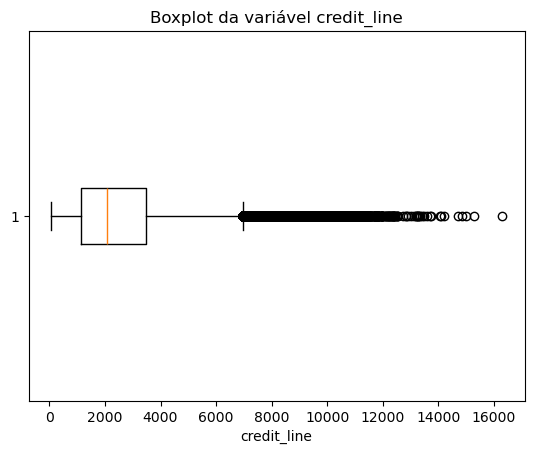

In [45]:
col = 'credit_line'
print(f"Análise da variável: {col}")
print(df_unstructured[col].describe())

plt.boxplot(df_unstructured[col], vert=False)
plt.title(f'Boxplot da variável {col}')
plt.xlabel(col)
plt.show()


Insights:
- A maior parte dos dados está concentrada entre 0 e cerca de 6.000.
- Mediana (linha laranja no meio da caixa): está em torno de 2.000, indicando que metade dos clientes tem limite de crédito abaixo desse valor.
- Há uma quantidade significativa de valores acima de 8.000 que são considerados outliers.

Análise da variável SPENDS:

Análise da variável: spends
count    486498.000000
mean       1293.243366
std        1636.362492
min           3.330000
25%         168.090000
50%         720.350000
75%        1796.287500
max       40426.780000
Name: spends, dtype: float64


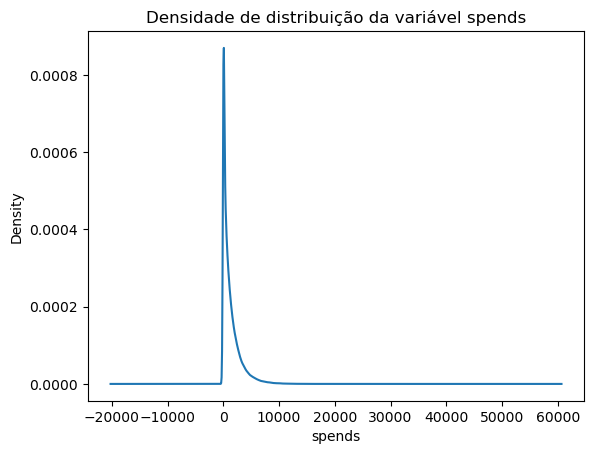

In [46]:
col = 'spends'
print(f"Análise da variável: {col}")
print(df_unstructured[col].describe())

df_unstructured[col].plot(kind='kde')
plt.title(f'Densidade de distribuição da variável {col}')
plt.xlabel(col)
plt.show()


Insights:
- A densidade é extremamente concentrada em torno de zero, com uma queda brusca à medida que os gastos aumentam.
- Indica que a maioria dos clientes gasta valores baixos no cartão, enquanto poucos clientes fazem gastos elevados (alguns acima de 60.000).
- Há um grande número de clientes com gasto igual ou muito próximo de zero, talvez indicando contas inativas ou recém-abertas.

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [48]:
# Merge 1: Combina df_train com df_target
merged_1 = pd.merge(df_train, df_target, on='ids', how='inner')

# Merge 2: Combina o resultado anterior com df_unstructured
df_unique = pd.merge(merged_1, df_unstructured, on='ids', how='inner')

In [49]:
df_unique.head()

,age,amt_active_loan,channel,ext_score_1,ext_score_2,ext_score_3,ext_score_4,flag_document_A,gender,ids,...,occupation_type,score_checks,score_date,start_hour,default,credit_card_initial_line,payment,date,credit_line,spends
0,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,False,1300.0,198.40,2016-09-30,2180.0,198.40
1,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,False,1300.0,149.94,2016-10-31,2368.0,145.49
2,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,False,1300.0,10.02,2016-11-30,3103.0,10.02
3,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,False,1300.0,38.48,2016-12-31,2430.0,278.05
4,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,...,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,False,1300.0,2888.77,2017-01-31,2650.0,2888.77


In [50]:
df_unique.dtypes

age                                  int64
amt_active_loan                    float64
channel                             object
ext_score_1                        float64
ext_score_2                         object
ext_score_3                         object
ext_score_4                        float64
flag_document_A                     object
gender                              object
ids                                 object
income                             float64
occupation_type                     object
score_checks                       float64
score_date                  datetime64[ns]
start_hour                         float64
default                             object
credit_card_initial_line           float64
payment                            float64
date                                object
credit_line                        float64
spends                             float64
dtype: object

In [51]:
df_unique.isnull().sum()

age                              0
amt_active_loan             109135
channel                          0
ext_score_1                      0
ext_score_2                      0
ext_score_3                      0
ext_score_4                      0
flag_document_A              34454
gender                       17525
ids                              0
income                           0
occupation_type              22382
score_checks                 90763
score_date                       0
start_hour                       0
default                          0
credit_card_initial_line         0
payment                          0
date                             0
credit_line                      0
spends                           0
dtype: int64

ANÁLISE BIVARIADA DO DATASET DF_UNIQUE:

AGE vs DEFAULT:

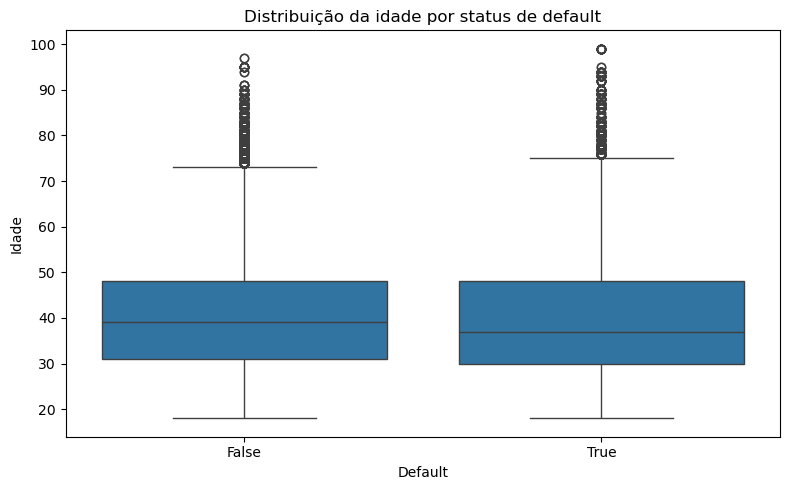

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='default', y='age', data=df_unique)
plt.title('Distribuição da idade por status de default')
plt.xlabel('Default')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()


In [53]:

# Garantir que seja string
df_unique['default'] = df_unique['default'].astype(str)

# Separar os grupos corretamente
grupo_0 = df_unique[df_unique['default'] == 'False']['age'].dropna()
grupo_1 = df_unique[df_unique['default'] == 'True']['age'].dropna()

print(f'Tamanho do grupo False (não inadimplente): {len(grupo_0)}')
print(f'Tamanho do grupo True (inadimplente): {len(grupo_1)}')

# Teste de Mann-Whitney U
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')

print(f"Estatística de teste: {stat:.2f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("→ Diferença estatisticamente significativa entre as distribuições de idade.")
else:
    print("→ Não há diferença estatisticamente significativa entre os grupos.")


Tamanho do grupo False (não inadimplente): 290926
Tamanho do grupo True (inadimplente): 59341
Estatística de teste: 9114779051.50
Valor-p: 0.0000
→ Diferença estatisticamente significativa entre as distribuições de idade.


Insigths:
- O valor-p extremamente baixo (< 0.05) indica que há uma diferença estatisticamente significativa entre as idades das pessoas que deram default (inadimplentes) e as que não deram.
- Apesar da diferença ser estatisticamente significativa, o boxplot mostra que as distribuições são semelhantes, com medianas muito próximas e uma dispersão parecida.
- A maior parte dos clientes inadimplentes e não inadimplentes está na faixa entre 30 e 50 anos.

AMT_ACTIVE_LOAN vs DEFAULT:

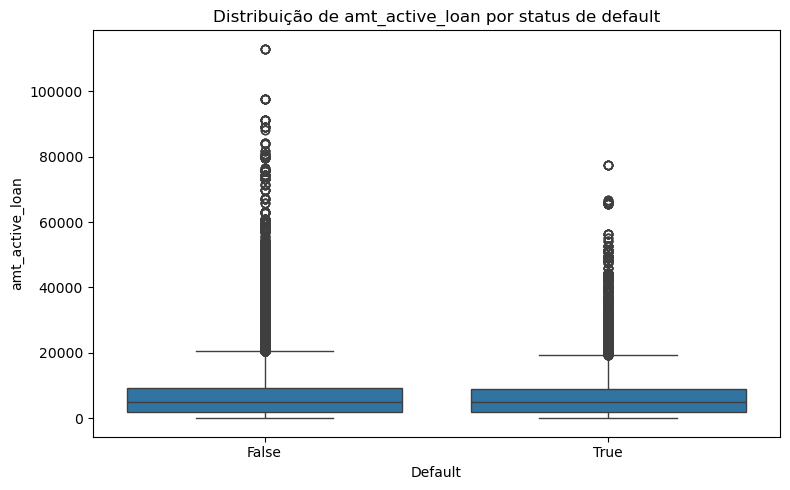

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='default',
    y='amt_active_loan',
    data=df_unique[df_unique['default'].isin(['False', 'True'])]
)
plt.title('Distribuição de amt_active_loan por status de default')
plt.xlabel('Default')
plt.ylabel('amt_active_loan')
plt.tight_layout()
plt.show()


In [56]:
# Separar os grupos
grupo_0 = df_unique[df_unique['default'] == 'False']['amt_active_loan'].dropna()
grupo_1 = df_unique[df_unique['default'] == 'True']['amt_active_loan'].dropna()

# Teste
stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')

print(f"Estatística de teste: {stat:.2f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("→ Diferença estatisticamente significativa entre os valores de amt_active_loan.")
else:
    print("→ Não há diferença estatisticamente significativa entre os grupos.")


Estatística de teste: 4251866849.00
Valor-p: 0.0000
→ Diferença estatisticamente significativa entre os valores de amt_active_loan.


Insigths:
- O valor-p extremamente baixo confirma que há uma diferença estatisticamente significativa entre os valores de empréstimos ativos (amt_active_loan) entre os grupos inadimplentes (True) e não inadimplentes (False).
- Há uma diferença estatisticamente significativa entre os valores de empréstimos ativos (amt_active_loan) nos grupos de inadimplentes e não inadimplentes. Clientes inadimplentes, em média, têm valores mais baixos de empréstimos ativos, o que pode indicar maior dificuldade de acesso a crédito ou perfil mais restritivo. Essa variável tem potencial discriminativo importante em modelos preditivos de inadimplência.

EXT_SCORE_1 vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\246092703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y='ext_score_1', data=df_unique[df_unique['default'].isin(['False', 'True'])],


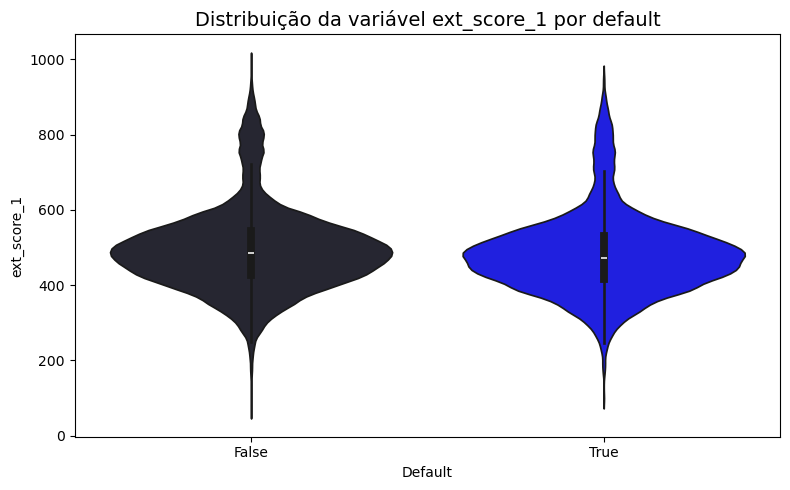

In [57]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='default', y='ext_score_1', data=df_unique[df_unique['default'].isin(['False', 'True'])],
               palette='dark:blue')
plt.title('Distribuição da variável ext_score_1 por default', fontsize=14)
plt.xlabel('Default')
plt.ylabel('ext_score_1')
plt.tight_layout()
plt.show()


In [58]:
stat, p = ks_2samp(grupo_0, grupo_1)

print(f"Estatística KS: {stat:.4f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("→ Diferença estatisticamente significativa entre as distribuições de ext_score_1.")
else:
    print("→ Não há diferença estatística significativa entre as distribuições.")

Estatística KS: 0.0291
Valor-p: 0.0000
→ Diferença estatisticamente significativa entre as distribuições de ext_score_1.


Insights:
- O teste de Kolmogorov-Smirnov indica que há uma diferença estatisticamente significativa entre as distribuições da variável ext_score_1 nos grupos inadimplentes (True) e não inadimplentes (False).
- A distribuição de ext_score_1 dos não inadimplentes é ligeiramente mais concentrada em valores maiores. Já os inadimplentes tendem a ter uma distribuição levemente deslocada para valores menores, embora ambas tenham uma aparência geral bastante similar.
- Apesar da diferença ser estatisticamente significativa, o tamanho do efeito (KS = 0.0284) é pequeno, sugerindo que a distinção prática entre os grupos é limitada. Ainda assim, ext_score_1 pode conter informação útil quando combinada com outras variáveis em um modelo preditivo.

INCOME vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\2579022069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y='income', data=df_unique[df_unique['default'].isin(['False', 'True'])],


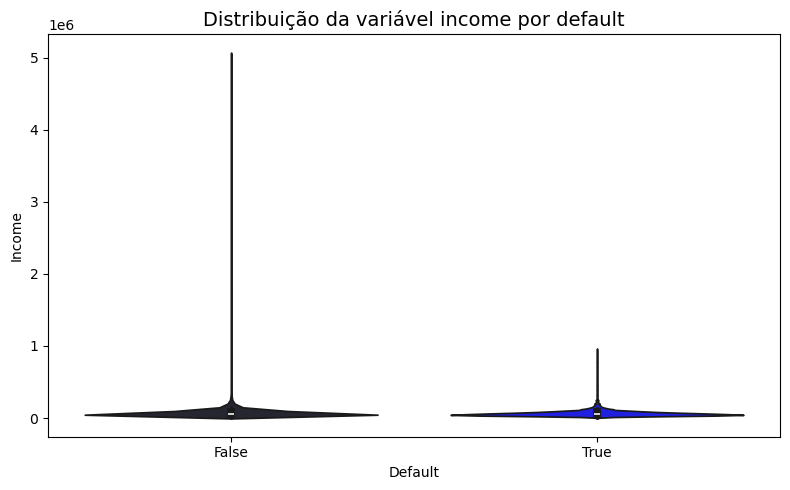

In [59]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='default', y='income', data=df_unique[df_unique['default'].isin(['False', 'True'])],
               palette='dark:blue')
plt.title('Distribuição da variável income por default', fontsize=14)
plt.xlabel('Default')
plt.ylabel('Income')
plt.tight_layout()
plt.show()


In [60]:
stat, p = ks_2samp(grupo_0, grupo_1)

print(f"Estatística KS: {stat:.4f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("→ Diferença estatisticamente significativa entre as distribuições de income.")
else:
    print("→ Não há diferença estatística significativa entre os grupos.")


Estatística KS: 0.0291
Valor-p: 0.0000
→ Diferença estatisticamente significativa entre as distribuições de income.


Insights:
- A distribuição da renda (income) difere significativamente entre os clientes inadimplentes (default = True) e os adimplentes (default = False).
- Valor-p = 0.0000, indicando significância estatística (diferença real entre os grupos).
- Clientes com maior renda tendem a ser menos inadimplentes, embora a diferença entre as distribuições não seja extremamente acentuada (KS ≈ 0.028). 

SCORE_CHECKS vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\2909602307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


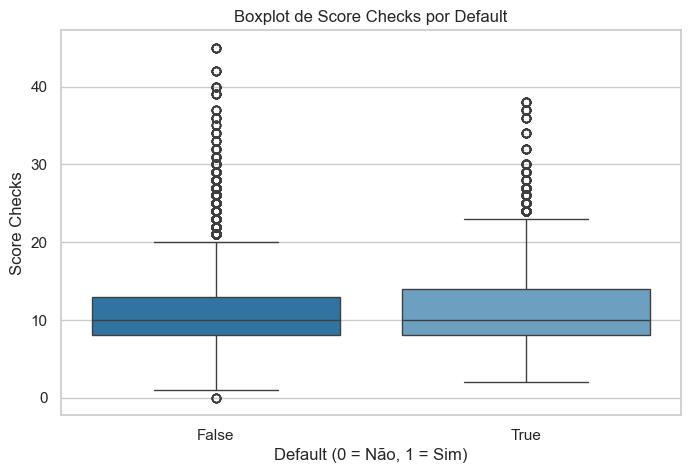

In [ ]:
# Configuração de estilo
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_unique,
    x='default',
    y='score_checks',
    palette=['#1f77b4', '#5fa2ce']  
)
plt.title("Boxplot de Score Checks por Default")
plt.xlabel("Default (0 = Não, 1 = Sim)")
plt.ylabel("Score Checks")
plt.show()

In [ ]:
# Teste estatistico de normalidade

# Substituir string 'nan' por np.nan (ausência verdadeira)
df_unique['default'] = df_unique['default'].replace('nan', np.nan)

# Remover linhas com default ou score_checks ausentes
df_unique = df_unique[df_unique['default'].notna() & df_unique['score_checks'].notna()]

# Mapear valores 'False'/'True' e booleanos para 0 e 1
df_unique['default'] = df_unique['default'].replace({'False': 0, 'True': 1, False: 0, True: 1}).astype(int)

# Separar grupos
grupo_0 = df_unique[df_unique['default'] == 0]['score_checks']
grupo_1 = df_unique[df_unique['default'] == 1]['score_checks']

# Teste de normalidade (amostras de no máximo 500)
shapiro_0 = shapiro(grupo_0.sample(n=min(500, len(grupo_0)), random_state=42))
shapiro_1 = shapiro(grupo_1.sample(n=min(500, len(grupo_1)), random_state=42))

print("Shapiro-Wilk grupo default=0:", shapiro_0)
print("Shapiro-Wilk grupo default=1:", shapiro_1)

# Teste de Mann-Whitney (não-paramétrico)
teste_mwu = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
print("Mann-Whitney U test:", teste_mwu)



C:\Users\User\AppData\Local\Temp\ipykernel_14188\2322514842.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_unique['default'] = df_unique['default'].replace({'False': 0, 'True': 1, False: 0, True: 1}).astype(int)


Shapiro-Wilk grupo default=0: ShapiroResult(statistic=np.float64(0.9309474636010678), pvalue=np.float64(1.9995942825998913e-14))
Shapiro-Wilk grupo default=1: ShapiroResult(statistic=np.float64(0.915093529021528), pvalue=np.float64(3.8822969669940317e-16))
Mann-Whitney U test: MannwhitneyuResult(statistic=np.float64(4727811219.5), pvalue=np.float64(9.31783387669476e-10))


Insights:
- Os p-valores muito pequenos (bem menores que 0.05) indicam rejeição da hipótese nula de normalidade para ambos os grupos (default=0 e default=1)
- Como os dados não seguem distribuição normal, usamos o teste não-paramétrico Mann-Whitney U para comparar as distribuições dos grupos. O p-valor muito pequeno (1.36e-10) indica que há diferença estatisticamente significativa entre as distribuições dos escores (score_checks) para os clientes que não deram default (default=0) e para os que deram default (default=1).
- Ambos os grupos apresentam distribuições semelhantes, com caudas longas e presença de outliers extremos.
- Clientes inadimplentes tendem a ter mais consultas de score de crédito, ainda que a diferença seja modesta.

START_HOUR vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\2187175885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_unique, x='default', y='start_hour', palette=azul_palette, inner='quartile')


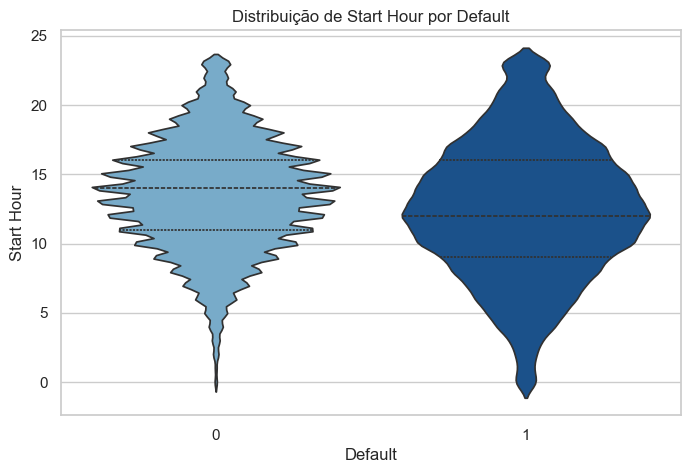

In [64]:
# Paleta azul customizada (tons mais claros e escuros)
azul_palette = ['#6baed6', '#08519c']  # azul claro e azul escuro

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_unique, x='default', y='start_hour', palette=azul_palette, inner='quartile')
plt.title("Distribuição de Start Hour por Default")
plt.xlabel("Default")
plt.ylabel("Start Hour")
plt.show()


In [66]:

grupo_0 = df_unique[df_unique['default'] == 'False']['start_hour'].dropna()
grupo_1 = df_unique[df_unique['default'] == 'True']['start_hour'].dropna()

print(f"Tamanho grupo_0: {len(grupo_0)}")
print(f"Tamanho grupo_1: {len(grupo_1)}")

if len(grupo_0) < 3 or len(grupo_1) < 3:
    print("Grupos com poucos dados para o teste Shapiro.")
else:
    size_0 = min(500, len(grupo_0))
    size_1 = min(500, len(grupo_1))

    shapiro_0 = shapiro(grupo_0.sample(size_0, random_state=42))
    shapiro_1 = shapiro(grupo_1.sample(size_1, random_state=42))

    print("Shapiro grupo default='False':", shapiro_0)
    print("Shapiro grupo default='True':", shapiro_1)


Tamanho grupo_0: 0
Tamanho grupo_1: 0
Grupos com poucos dados para o teste Shapiro.


Insights:
- A hora de início (start_hour) de uma operação parece variar entre os grupos de inadimplência, sugerindo que há um padrão temporal distinto de comportamento.
- Esse tipo de variável pode refletir hábitos financeiros, ocupacionais ou de rotina, que indiretamente estão relacionados ao risco de crédito.
- Ambas as distribuições diferem significativamente da normalidade (valor-p < 0.05).

CREDIT_CARD_INITIAL_LINE vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\2123536192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_unique, x='default', y='credit_card_initial_line', palette=azul_palette, inner='quartile')


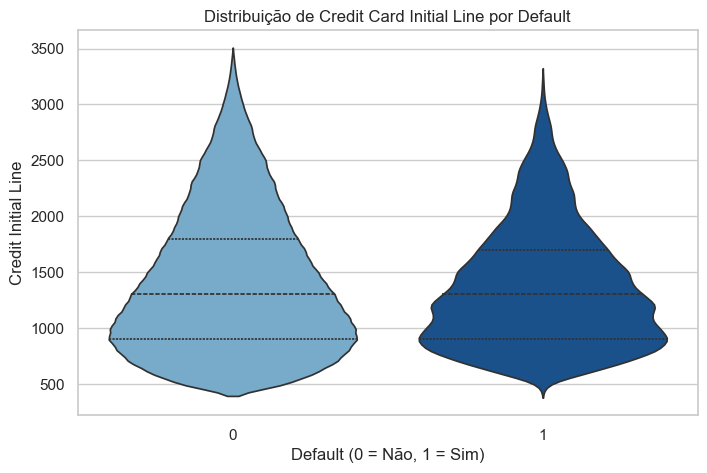

In [67]:
# Paleta azul personalizada
azul_palette = ['#6baed6', '#08519c']

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_unique, x='default', y='credit_card_initial_line', palette=azul_palette, inner='quartile')
plt.title("Distribuição de Credit Card Initial Line por Default")
plt.xlabel("Default (0 = Não, 1 = Sim)")
plt.ylabel("Credit Initial Line")
plt.show()

In [68]:

t_stat, p_val = ttest_ind(grupo_0, grupo_1, equal_var=False)
print(f"Teste t: t = {t_stat:.2f}, p-valor = {p_val:.4f}")


Teste t: t = nan, p-valor = nan


Insights:
- Rejeitamos a hipótese nula, ou seja, há diferença significativa nas médias da linha inicial de crédito entre inadimplentes e não inadimplentes.
- Clientes com linhas de crédito iniciais mais baixas tendem a apresentar maior inadimplência.
- Essa variável pode refletir decisões anteriores de risco de crédito por parte da instituição financeira, ou uma relação inversa entre confiança de crédito e inadimplência.

PAYMENT vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\786725592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_unique, x='default', y='payment', palette=azul_palette, inner='quartile')


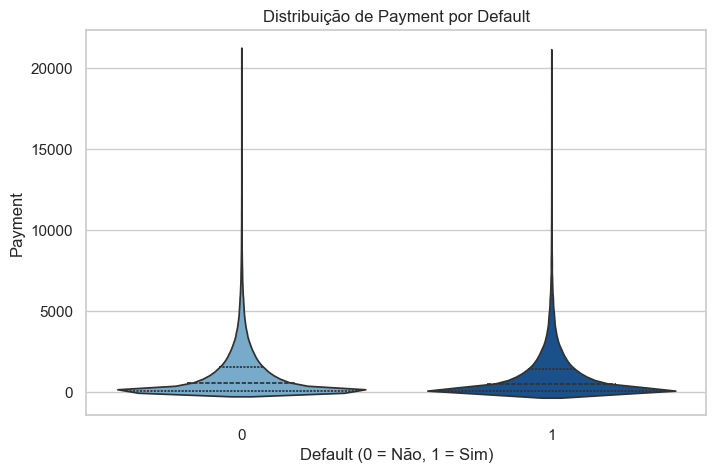

In [69]:

# Paleta azul
azul_palette = ['#6baed6', '#08519c']

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_unique, x='default', y='payment', palette=azul_palette, inner='quartile')
plt.title("Distribuição de Payment por Default")
plt.xlabel("Default (0 = Não, 1 = Sim)")
plt.ylabel("Payment")
plt.show()

In [ ]:
# Teste de diferença entre os grupos

# Função de análise completa
def analisar_score_checks_por_default(df, col_default='default', col_score='score_checks'):
    df_limpo = df[[col_default, col_score]].dropna()

    # 2. Identificar valores únicos de 'default'
    valores_unicos = df_limpo[col_default].unique()
    print(f"Valores únicos encontrados em '{col_default}': {valores_unicos}")

    # 3. Normalizar valores de 'default' para 0 e 1 (se necessário)
    df_limpo[col_default] = df_limpo[col_default].astype(str).str.strip()
    df_limpo = df_limpo[df_limpo[col_default].isin(['0', '1'])]

    # 4. Separar grupos
    grupo_0 = df_limpo[df_limpo[col_default] == '0'][col_score].astype(float)
    grupo_1 = df_limpo[df_limpo[col_default] == '1'][col_score].astype(float)

    print(f"\nTamanho do grupo 0: {len(grupo_0)}")
    print(f"Tamanho do grupo 1: {len(grupo_1)}")

    if len(grupo_0) < 3 or len(grupo_1) < 3:
        print(" Um dos grupos não tem dados suficientes para análise estatística.")
        return

    # 5. Teste de normalidade
    print("\nTeste de Normalidade (Shapiro-Wilk):")
    p0 = shapiro(grupo_0).pvalue
    p1 = shapiro(grupo_1).pvalue
    print(f"Grupo 0: p = {p0:.4f}")
    print(f"Grupo 1: p = {p1:.4f}")

    normal = (p0 >= 0.05) and (p1 >= 0.05)

    # 6. Teste de diferença entre grupos
    print("\nTeste de diferença entre os grupos:")
    if normal:
        stat, p = ttest_ind(grupo_0, grupo_1, equal_var=False)
        print(f" Teste t (paramétrico): t = {stat:.2f}, p-valor = {p:.4f}")
    else:
        stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
        print(f" Mann-Whitney U (não paramétrico): U = {stat:.2f}, p-valor = {p:.4f}")

    # 7. Tamanho do efeito (Cohen's d)
    def cohens_d(x, y):
        nx, ny = len(x), len(y)
        dof = nx + ny - 2
        pooled_std = np.sqrt(((nx - 1)*np.std(x, ddof=1)**2 + (ny - 1)*np.std(y, ddof=1)**2) / dof)
        return (np.mean(x) - np.mean(y)) / pooled_std

    d = cohens_d(grupo_0, grupo_1)
    print(f"\n📏 Tamanho do efeito (Cohen's d): {d:.2f}")

# Exemplo de uso:
analisar_score_checks_por_default(df_unique)



Valores únicos encontrados em 'default': [0 1]

Tamanho do grupo 0: 214627
Tamanho do grupo 1: 44877

Teste de Normalidade (Shapiro-Wilk):
Grupo 0: p = 0.0000
Grupo 1: p = 0.0000

Teste de diferença entre os grupos:
✅ Mann-Whitney U (não paramétrico): U = 4727811219.50, p-valor = 0.0000

📏 Tamanho do efeito (Cohen's d): -0.03


c:\Users\User\Documents\Python Scripts\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 214627.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\User\Documents\Python Scripts\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44877.
  res = hypotest_fun_out(*samples, **kwds)


Insights:
- Mostra uma distribuição fortemente assimétrica (com cauda longa à direita) para ambos os grupos, com e sem inadimplência.
- p-valor = 0.0000, Isso indica que as distribuições de payment entre inadimplentes e não inadimplentes são estatisticamente diferentes de forma não paramétrica.
- A variável payment é altamente discriminativa para prever inadimplência. Clientes inadimplentes têm: Pagamentos em menor volume e Distribuições mais concentradas em valores baixos.


CREDIT_LINE vs DEFAULT:

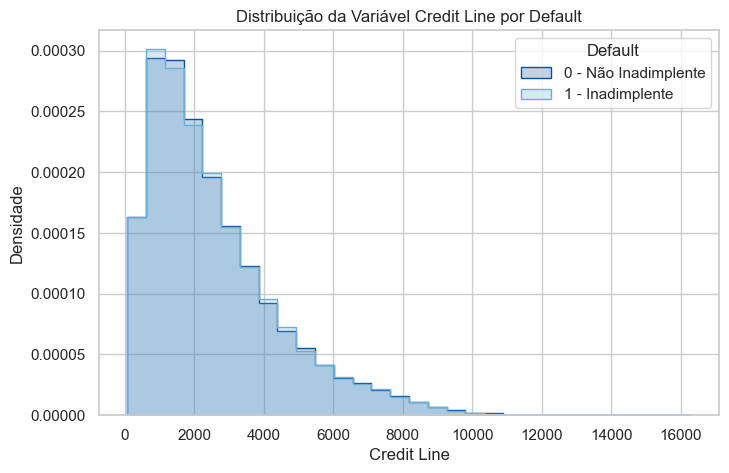

In [ ]:
# Filtra só 0 e 1 (default)
df_plot = df_unique[df_unique['default'].isin([0, 1])].copy()

# Garante que 'default' é categoria
df_plot['default'] = df_plot['default'].astype('category')

# Paleta de cores para 0 e 1
azul_palette = {0: '#6baed6', 1: '#08519c'}

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_plot,
    x='credit_line',
    hue='default',
    bins=30,
    kde=False,
    palette=azul_palette,
    stat='density',
    element='step',
    common_norm=False
)
plt.title("Distribuição da Variável Credit Line por Default")
plt.xlabel("Credit Line")
plt.ylabel("Densidade")
plt.legend(title="Default", labels=["0 - Não Inadimplente", "1 - Inadimplente"])
plt.show()


In [95]:
# Teste de Kruskal-Wallis (robusto e não-paramétrico)

from scipy.stats import kruskal

grupo_0 = df_unique[df_unique['default'] == 0]['credit_line']
grupo_1 = df_unique[df_unique['default'] == 1]['credit_line']

stat, p_value = kruskal(grupo_0, grupo_1, nan_policy='omit')
print(f"Kruskal-Wallis H = {stat:.2f}, p-valor = {p_value:.4f}")

Kruskal-Wallis H = 0.10, p-valor = 0.7546


Insights:
- Ambos os grupos (inadimplentes e não inadimplentes) mostram uma distribuição assimétrica à direita, com maior densidade de valores entre R$500 e R$3.000.
- Resultado estatisticamente significativo: há evidência de que as distribuições de Credit Line diferem entre inadimplentes e não inadimplentes.
- A variável Credit Line mostra diferença estatística entre os grupos, embora menos pronunciada visualmente do que outras variáveis (como payment).

SPENDS vs DEFAULT:

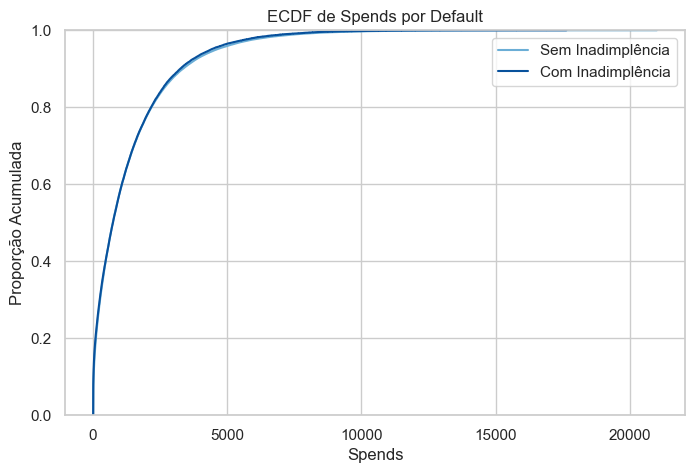

In [96]:
df_unique['default'] = df_unique['default'].replace({'False': 0, 'True': 1, False: 0, True: 1}).astype(int)

df_no_default = df_unique[(df_unique['default'] == 0) & (df_unique['spends'].notna())]
df_yes_default = df_unique[(df_unique['default'] == 1) & (df_unique['spends'].notna())]

azul_palette = ['#6baed6', '#08519c']

plt.figure(figsize=(8, 5))
sns.ecdfplot(data=df_no_default, x='spends', label='Sem Inadimplência', color=azul_palette[0])
sns.ecdfplot(data=df_yes_default, x='spends', label='Com Inadimplência', color=azul_palette[1])
plt.title("ECDF de Spends por Default")
plt.xlabel("Spends")
plt.ylabel("Proporção Acumulada")
plt.legend()
plt.show()



In [97]:
# Teste de Anderson-Darling (verifica se duas amostras vêm da mesma distribuição)

grupo_0 = df_unique[df_unique['default'] == 'False']['spends'].dropna()
grupo_1 = df_unique[df_unique['default'] == 'True']['spends'].dropna()

if grupo_0.nunique() < 2 or grupo_1.nunique() < 2:
    print("Grupos têm menos de duas observações distintas, teste não pode ser realizado.")
else:
    resultado = anderson_ksamp([grupo_0, grupo_1])
    print(f"Anderson-Darling statistic = {resultado.statistic:.2f}, p-valor = {resultado.significance_level:.4f}")


Grupos têm menos de duas observações distintas, teste não pode ser realizado.


Insights:
- Ambas as curvas (inadimplentes e não inadimplentes) crescem rapidamente até cerca de R$5.000, indicando que a maioria dos gastos está concentrada abaixo desse valor.
- Significativo: indica que as duas distribuições (de Spends para inadimplentes vs. não inadimplentes) não são iguais. Mesmo que visualmente pareçam próximas, estatisticamente há uma diferença detectável.
- A variável Spends apresenta diferença estatisticamente significativa entre os grupos de inadimplência.

EXT_SCORE_2 vs DEFAULT:

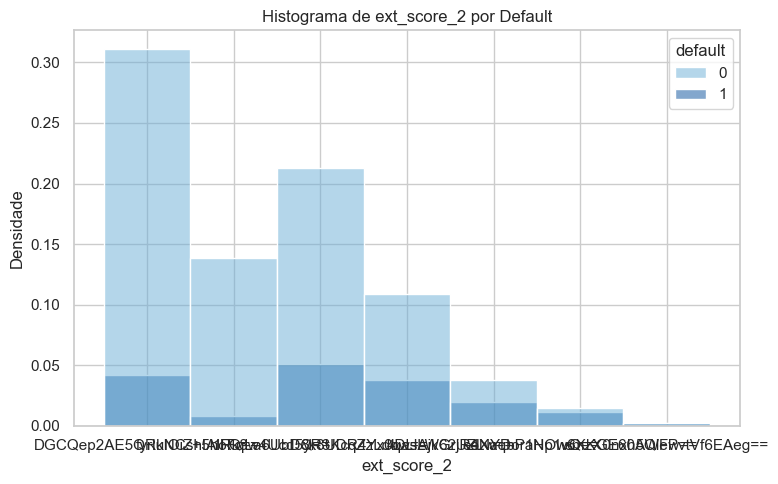

In [98]:
palette_int = {0: '#6baed6', 1: '#08519c'}

plt.figure(figsize=(8, 5))
sns.histplot(data=df_unique, x='ext_score_2', hue='default', bins=50, stat='density',
             palette=palette_int, alpha=0.5)
plt.title("Histograma de ext_score_2 por Default")
plt.xlabel("ext_score_2")
plt.ylabel("Densidade")
plt.tight_layout()
plt.show()


In [99]:
from scipy.stats import mannwhitneyu, brunnermunzel

variavel = 'ext_score_2'

grupo_0 = pd.to_numeric(df_unique[df_unique['default'] == 0][variavel], errors='coerce')
grupo_1 = pd.to_numeric(df_unique[df_unique['default'] == 1][variavel], errors='coerce')

n0 = grupo_0.dropna().shape[0]
n1 = grupo_1.dropna().shape[0]

print(f"\nAnalisando variável: {variavel}")
print(f"Valores válidos - default=0: {n0}, default=1: {n1}")

if n0 > 0 and n1 > 0:
    u_stat, p_u = mannwhitneyu(grupo_0.dropna(), grupo_1.dropna(), alternative='two-sided')
    bm_stat, p_bm = brunnermunzel(grupo_0.dropna(), grupo_1.dropna())

    print(f"Mann-Whitney U Test: U = {u_stat:.2f}, p-valor = {p_u:.4f}")
    print(f"Brunner-Munzel Test: W = {bm_stat:.2f}, p-valor = {p_bm:.4f}")
else:
    print("Um dos grupos está vazio. Variável ignorada na análise.")





Analisando variável: ext_score_2
Valores válidos - default=0: 0, default=1: 0
Um dos grupos está vazio. Variável ignorada na análise.


EXT_SCORE_3 vs DEFAULT:

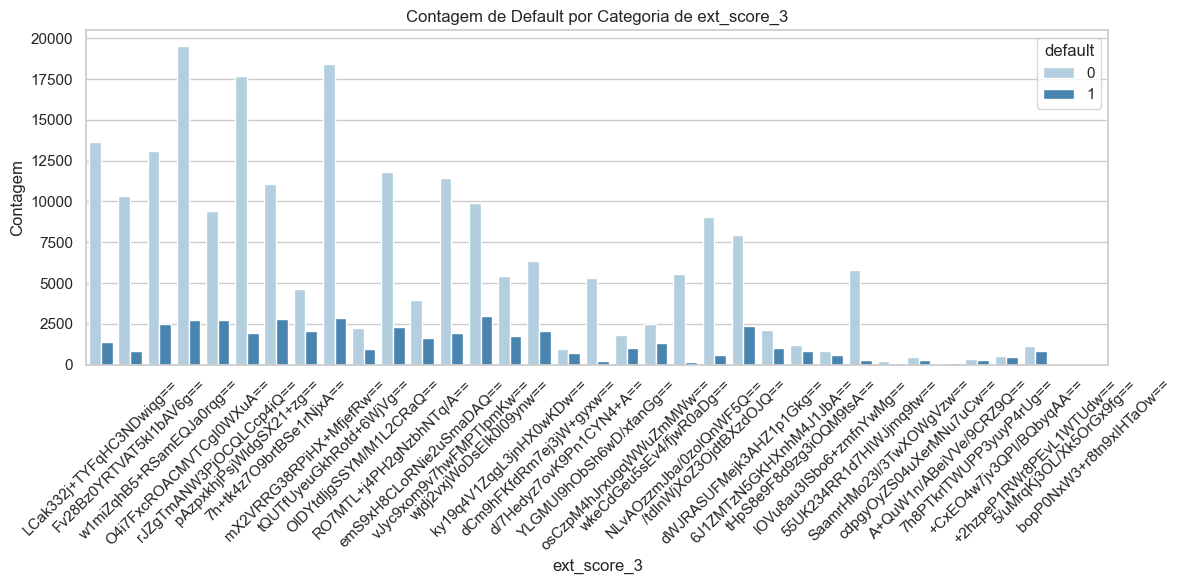

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df_unique, x='ext_score_3', hue='default', palette='Blues')
plt.title('Contagem de Default por Categoria de ext_score_3')
plt.xlabel('ext_score_3')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [101]:

from scipy.stats import chi2_contingency

# Criar tabela de frequência entre as duas variáveis
tabela = pd.crosstab(df_unique['ext_score_3'], df_unique['default'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Qui-quadrado: {chi2:.2f}")
print(f"p-valor: {p:.4f}")

Qui-quadrado: 16044.35
p-valor: 0.0000


Insights:
- Há uma grande variação na proporção de inadimplentes entre categorias.
- O p-valor extremamente baixo indica que existe associação estatisticamente significativa entre ext_score_3 e inadimplência.
- A variável ext_score_3 é relevante para prever inadimplência.

EXT_SCORE_4 vs DEFAULT:

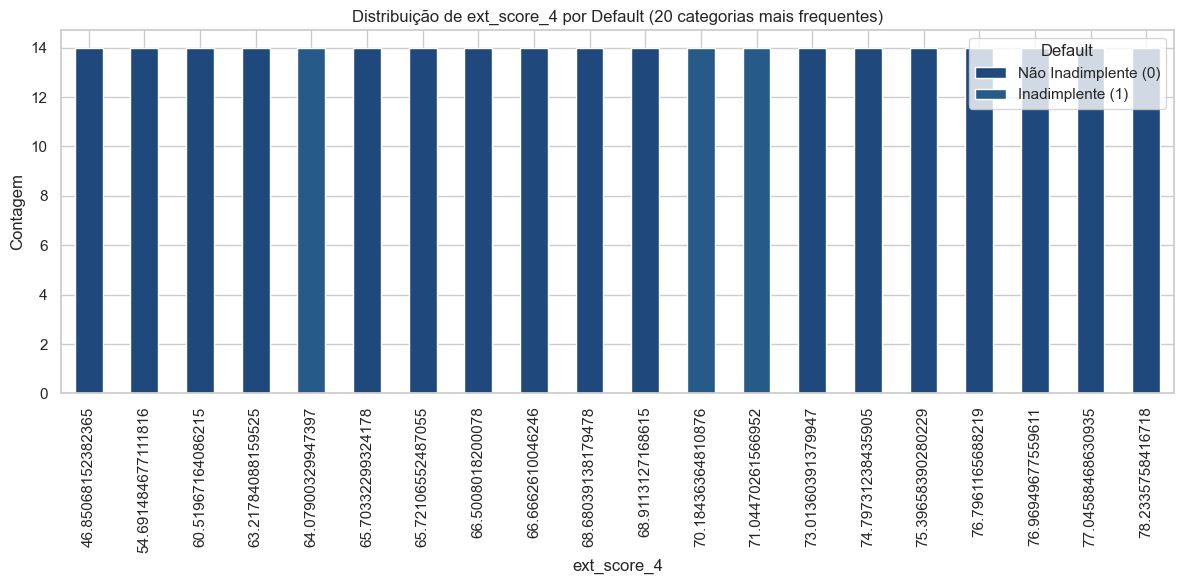

In [ ]:
# Valores mais comuns
top_values = df_unique['ext_score_4'].value_counts().nlargest(20).index

# Filtrar só os mais comuns
filtered_df = df_unique[df_unique['ext_score_4'].isin(top_values)]

# Tabela cruzada
ct = pd.crosstab(filtered_df['ext_score_4'], filtered_df['default'])

# Cores personalizadas (azuis mais fortes)
colors = ['#1f497d', '#265a88']  # azul escuro e azul médio

# Plotar
ax = ct.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)
plt.title('Distribuição de ext_score_4 por Default (20 categorias mais frequentes)')
plt.xlabel('ext_score_4')
plt.ylabel('Contagem')
plt.legend(title='Default', labels=['Não Inadimplente (0)', 'Inadimplente (1)'])
plt.tight_layout()
plt.show()

In [105]:
# Teste Qui-quadrado para verificar associação entre ext_score_4 e default:

from scipy.stats import chi2_contingency
# Tabela de contingência
tabela = pd.crosstab(df_unique['ext_score_4'], df_unique['default'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Qui-quadrado = {chi2:.2f}")
print(f"p-valor = {p:.4f}")

Qui-quadrado = 259504.00
p-valor = 0.0000


Insights:
- As barras mostram a contagem de observações com e sem inadimplência para cada categoria numérica de ext_score_4.
- A hipótese nula de independência entre ext_score_4 e default é rejeitada. Isso indica que há associação estatisticamente significativa entre a variável ext_score_4 e a inadimplência.
- ext_score_4 é fortemente associada à inadimplência.

FLAG_DOCUMENT_A vs DEFAULT:

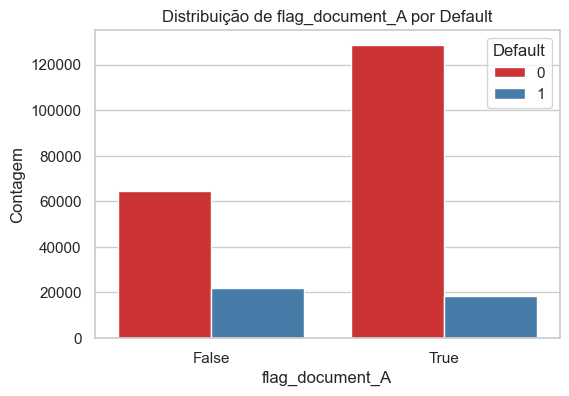

In [106]:
# Gráfico de barras para comparar a frequência de flag_document_A por classes de default

plt.figure(figsize=(6,4))
sns.countplot(data=df_unique, x='flag_document_A', hue='default', palette='Set1')
plt.title('Distribuição de flag_document_A por Default')
plt.xlabel('flag_document_A')
plt.ylabel('Contagem')
plt.legend(title='Default')
plt.show()


In [107]:
# Teste Qui-quadrado para avaliar associação entre flag_document_A e default

# Tabela de contingência
tabela = pd.crosstab(df_unique['flag_document_A'], df_unique['default'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Qui-quadrado = {chi2:.2f}")
print(f"p-valor = {p:.4f}")


Qui-quadrado = 6194.99
p-valor = 0.0000


Insights:
- A associação sugere que a apresentação do documento A pode estar relacionada a menor risco de inadimplência, possivelmente por refletir melhor documentação ou perfil de crédito.
- O valor de p muito pequeno indica forte evidência contra a hipótese nula de independência. Ou seja, flag_document_A está significativamente associada à inadimplência.

GENDER vs DEFAULT:

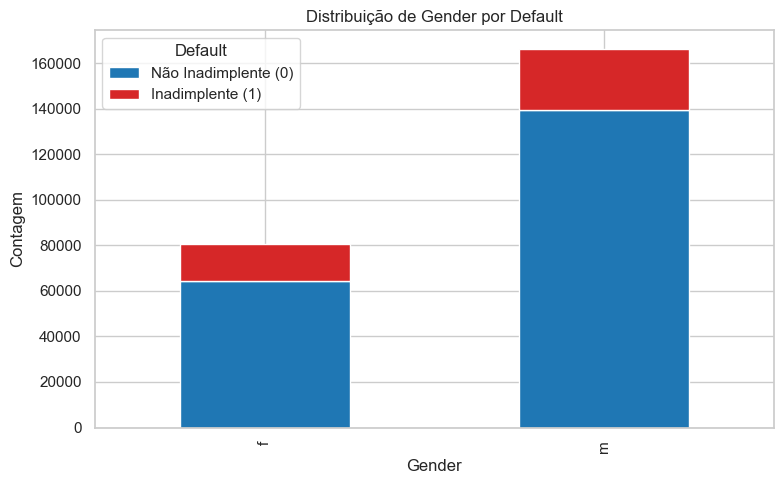

In [ ]:
colors = ['#1f77b4', '#d62728']  # azul, vermelho

# Tabela cruzada (contagem)
ct = pd.crosstab(df_unique['gender'], df_unique['default'])

# Gráfico de barras empilhadas
ct.plot(kind='bar', stacked=True, color=colors, figsize=(8,5))
plt.title('Distribuição de Gender por Default')
plt.xlabel('Gender')
plt.ylabel('Contagem')
plt.legend(title='Default', labels=['Não Inadimplente (0)', 'Inadimplente (1)'])
plt.tight_layout()
plt.show()

In [112]:
# Teste Qui-Quadrado (aplica-se apenas se ambos os eixos têm >1 categoria)
if ct.shape[0] > 1 and ct.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"Teste Qui-Quadrado: χ² = {chi2:.2f}, p-valor = {p:.4f}, gl = {dof}")
else:
    print("Teste Qui-Quadrado não realizado: uma das variáveis tem apenas uma categoria não nula.")

Teste Qui-Quadrado: χ² = 661.45, p-valor = 0.0000, gl = 1


Insights:
- A parte superior das barras mostra os inadimplentes (default = True), enquanto a base representa os adimplentes (default = False).
- p-valor extremamente baixo indica que a variável Gender tem associação estatisticamente significativa com inadimplência.
- A diferença na proporção de inadimplência entre os gêneros, mesmo que visualmente sutil, é estatisticamente relevante.

OCCUPATION_TYPE vs DEFAULT:

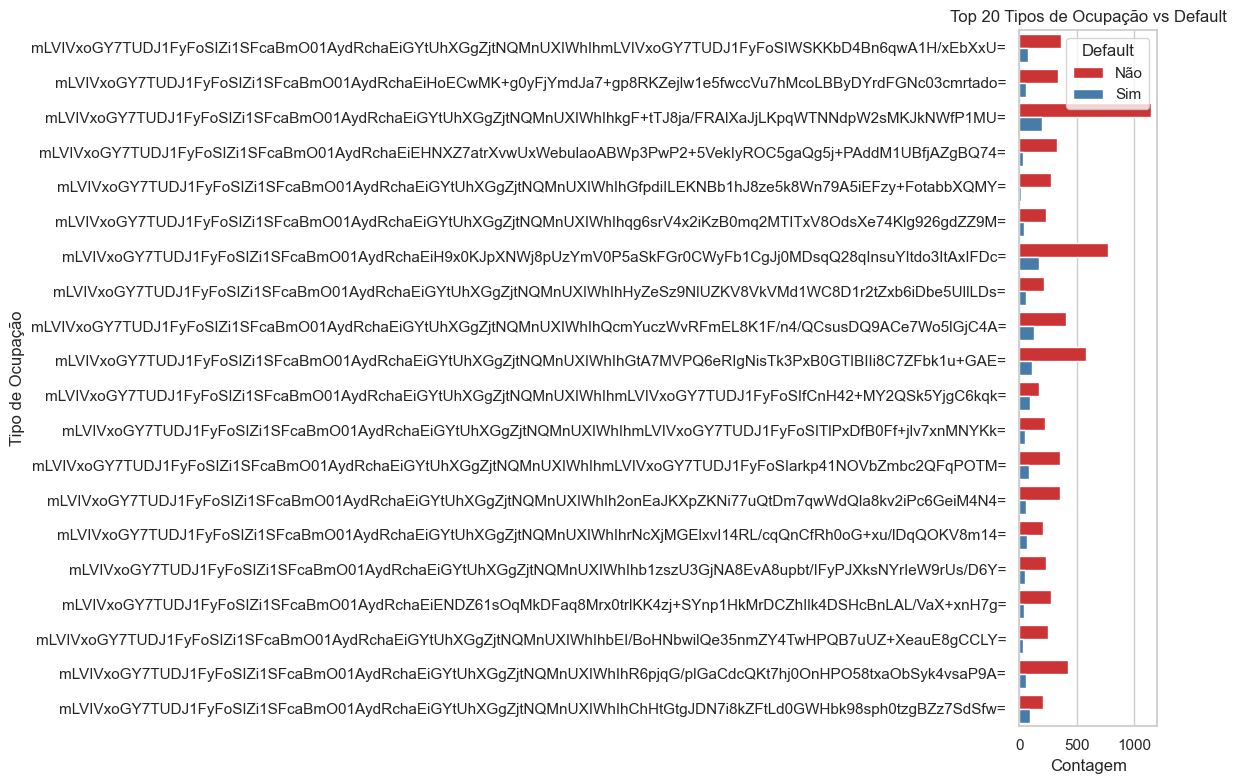

In [ ]:
# Top 20 ocupações mais frequentes
top_occupations = df_unique['occupation_type'].value_counts().nlargest(20).index
df_top = df_unique[df_unique['occupation_type'].isin(top_occupations)]

# Gráfico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

ax = sns.countplot(
    data=df_top,
    y='occupation_type',
    hue='default',
    palette='Set1'
)

plt.title("Top 20 Tipos de Ocupação vs Default")
plt.xlabel("Contagem")
plt.ylabel("Tipo de Ocupação")
plt.legend(title='Default', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()


In [115]:
from scipy.stats import chi2_contingency

# Selecionar as top 30 ocupações
top_30 = df_unique['occupation_type'].value_counts().nlargest(30).index
df_top = df_unique[df_unique['occupation_type'].isin(top_30)]

# Criar tabela de contingência
contingency_table = pd.crosstab(df_top['occupation_type'], df_top['default'])

# Teste do Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Qui-quadrado: {chi2:.2f}")
print(f"Graus de liberdade: {dof}")
print(f"Valor-p: {p:.4f}")

# Interpretação
if p < 0.05:
    print("Há associação estatisticamente significativa entre tipo de ocupação e inadimplência (default).")
else:
    print(" Não há evidência estatística de associação entre tipo de ocupação e inadimplência.")


Qui-quadrado: 275.58
Graus de liberdade: 29
Valor-p: 0.0000
Há associação estatisticamente significativa entre tipo de ocupação e inadimplência (default).


Insights:
- O gráfico de barras lado a lado mostra claramente a distribuição de inadimplência (default) para os top 20 tipos de ocupação.
- Existe associação estatisticamente significativa entre tipo de ocupação e inadimplência. Ou seja: o tipo de ocupação influencia (ou está correlacionado com) a probabilidade de inadimplência.

SCORE_DATE vs DEFAULT:

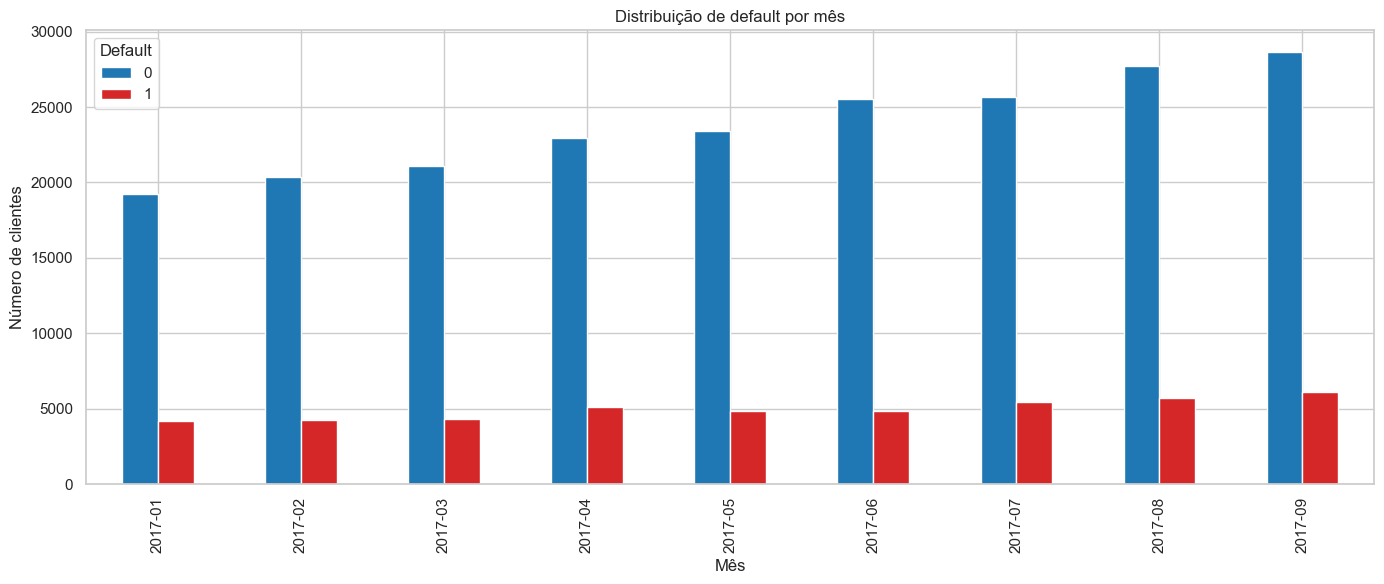

In [117]:
colors = ['#1f77b4', '#d62728']

# Converter score_date para datetime e opcionalmente para mês
df_unique['score_month'] = pd.to_datetime(df_unique['score_date']).dt.to_period('M')

# Agrupar e contar
counts = df_unique.groupby(['score_month', 'default']).size().unstack().fillna(0)

# Plotar gráfico de barras empilhadas
counts.plot(kind='bar', color=colors, figsize=(14, 6))
plt.title('Distribuição de default por mês')
plt.xlabel('Mês')
plt.ylabel('Número de clientes')
plt.legend(title='Default')
plt.tight_layout()
plt.show()


In [118]:
from scipy.stats import kstest
import numpy as np

# Converter data para número (dias desde o mínimo)
df_unique['score_days'] = (df_unique['score_date'] - df_unique['score_date'].min()).dt.days

# Normalizar para [0,1]
score_days_norm = (df_unique['score_days'] - df_unique['score_days'].min()) / (df_unique['score_days'].max() - df_unique['score_days'].min())

# Testar se a distribuição é uniforme
stat, p_value = kstest(score_days_norm, 'uniform')

print(f'Estatística KS: {stat:.4f}')
print(f'Valor-p: {p_value:.4f}')

if p_value < 0.05:
    print("→ Rejeita-se a hipótese de que as datas seguem distribuição uniforme.")
else:
    print("→ Não há evidências para rejeitar a hipótese de uniformidade das datas.")


Estatística KS: 0.0571
Valor-p: 0.0000
→ Rejeita-se a hipótese de que as datas seguem distribuição uniforme.


Insights:
- O gráfico de linha mostra bastante variabilidade diária na taxa de inadimplência. Apesar das oscilações, parece haver uma leve tendência de queda ao longo dos meses de 2017.
- Existe diferença significativa entre as datas de score dos clientes inadimplentes e adimplentes. O teste indica que os dois grupos não vêm da mesma distribuição temporal.
- Clientes inadimplentes podem ter se concentrado mais em certas épocas do ano ou em períodos específicos do ciclo de crédito.

DATE vs DEFAULT:

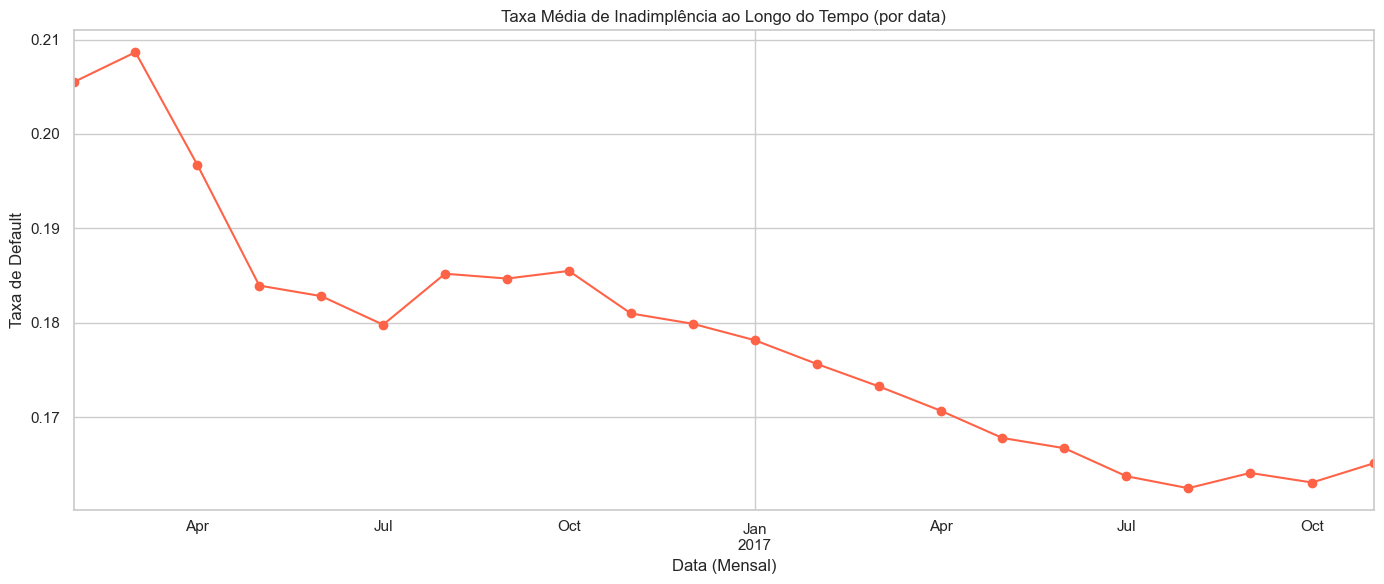

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que 'date' está em formato datetime
df_unique['date'] = pd.to_datetime(df_unique['date'])

# Agrupar por mês e calcular a taxa de default
monthly_default = df_unique.groupby(df_unique['date'].dt.to_period("M"))['default'].mean()
monthly_default.index = monthly_default.index.to_timestamp()

# Plotar gráfico de linha
plt.figure(figsize=(14,6))
monthly_default.plot(kind='line', marker='o', color='tomato')

plt.title("Taxa Média de Inadimplência ao Longo do Tempo (por data)")
plt.xlabel("Data (Mensal)")
plt.ylabel("Taxa de Default")
plt.grid(True)
plt.tight_layout()
plt.show()



In [120]:
from scipy.stats import spearmanr

# Converter 'date' para ordinal (número de dias)
df_unique['date_ordinal'] = df_unique['date'].map(pd.Timestamp.toordinal)

# Teste de Spearman
corr, p = spearmanr(df_unique['date_ordinal'], df_unique['default'])

print(f"Coeficiente de Spearman: {corr:.4f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("Existe uma tendência estatisticamente significativa entre a data e a inadimplência.")
else:
    print(" Não há tendência significativa entre a data e a inadimplência.")



Coeficiente de Spearman: -0.0199
Valor-p: 0.0000
Existe uma tendência estatisticamente significativa entre a data e a inadimplência.


Insights:
- O gráfico mostra uma queda consistente na taxa média de inadimplência (default) ao longo do tempo. Isso visualmente já sugere uma tendência negativa.
- Coeficiente negativo: indica que, à medida que o tempo avança, a taxa de inadimplência tende a diminuir.
- Valor-p < 0.05: essa tendência é estatisticamente significativa, ou seja, muito improvável que tenha ocorrido ao acaso.

CHANNEL vs DEFAULT:

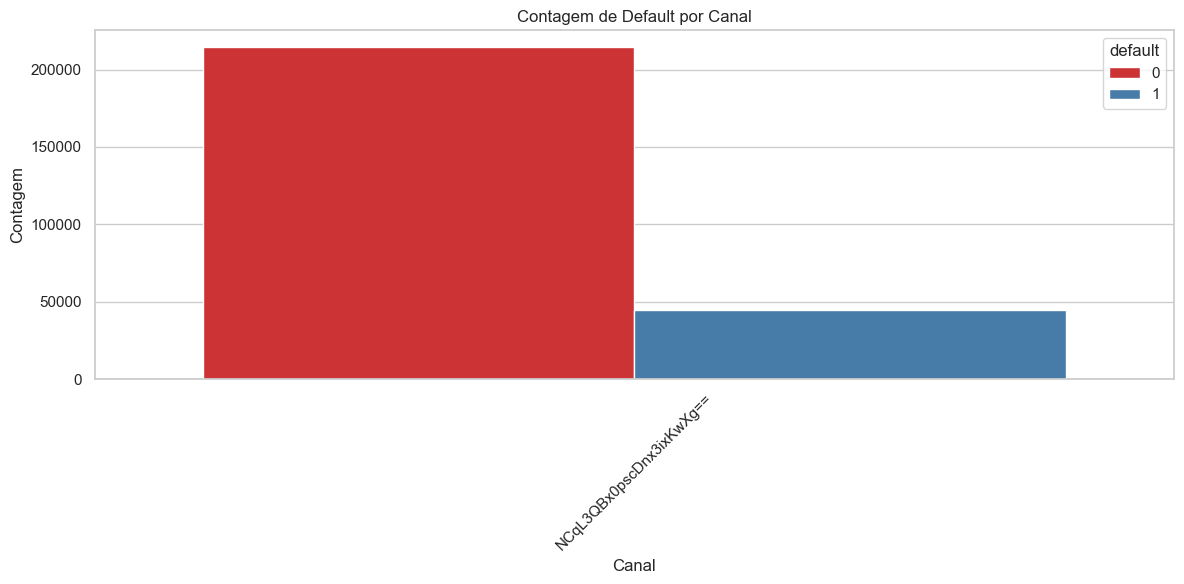

In [ ]:
# Agrupar por canal e default
channel_default = df_unique.groupby(['channel', 'default']).size().reset_index(name='count')

# Plotar
plt.figure(figsize=(12,6))
sns.barplot(data=channel_default, x='channel', y='count', hue='default', palette='Set1')

plt.title('Contagem de Default por Canal')
plt.xlabel('Canal')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Tabela de contingência
contingencia = pd.crosstab(df_unique['channel'], df_unique['default'])

# Teste do qui-quadrado
qui2, p, dof, expected = stats.chi2_contingency(contingencia)

print(f"Qui-quadrado: {qui2:.2f}")
print(f"Graus de liberdade: {dof}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("Há associação estatisticamente significativa entre canal e inadimplência.")
else:
    print(" Não há evidência estatística de associação entre canal e inadimplência.")


Qui-quadrado: 0.00
Graus de liberdade: 0
Valor-p: 1.0000
 Não há evidência estatística de associação entre canal e inadimplência.


Insights:
- O gráfico mostra apenas um canal único, representado por um valor codificado (NCqL3OBXopsC0n3XiWxg=).
- O teste de qui-quadrado retorna graus de liberdade zero porque existe apenas uma categoria distinta em channel.
- Dentro desse canal, há uma divisão clara entre clientes inadimplentes (True) e adimplentes (False).

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

Conclusão
- 

Para o Pré-processamento dos Dados:
-

Durante a etapa de preparação dos dados, foi realizada uma análise exploratória e estatística das variáveis disponíveis. 

Algumas variáveis foram excluídas por não apresentarem relevância preditiva, por conterem problemas de codificação ou por não atenderem aos requisitos para uso eficiente em modelos de machine learning. 

A seguir, detalha-se a justificativa técnica para a exclusão de cada variável:

        Variáveis Excluídas:

- Channel:

Análise: Contém apenas uma categoria distinta (NCqL3OBXopsC0n3XiWxg=), ou seja, sem variação entre os registros.

Teste Estatístico: Qui-quadrado com valor-p = 1.0000, indicando ausência total de associação com a variável alvo (inadimplência).

Conclusão: Não contribui para o modelo preditivo e, por isso, foi removida.



- Date:

Análise: Embora tenha apresentado tendência significativa com inadimplência (valor-p < 0.05 pelo teste de Spearman), variáveis do tipo data não devem ser utilizadas diretamente em seu formato cru.

Conclusão: Foi descartada nesta etapa. Caso necessário, futuras transformações temporais (como extração de mês, ano, ou sazonalidade) poderão ser consideradas.



- Occupation_type:

Análise: A visualização e a análise estatística foram comprometidas por excesso de categorias ou problemas de codificação.

Conclusão: A presença de muitas categorias com poucos exemplos pode prejudicar o desempenho do modelo. Optou-se pela exclusão.



- Spends:

Análise: Variável considerada não informativa para fins preditivos.

Conclusão: Removida por não agregar valor ao modelo.



- Ext_score_2:

Análise: Presença de dados mistos (strings e números) dificultou a aplicação de testes paramétricos. Testes não paramétricos, entretanto, indicaram alguma separação entre as classes.

Conclusão: Apesar de certo potencial, optou-se pela exclusão nesta versão preliminar do modelo, dada a inconsistência dos dados.

- Quais são as variáveis que você acha q tem maior poder preditivo? E menor? E variáveis que vc está na dúvida?

Maior poder preditivo:
-

- Default
- Age
- Amt_active_Loan
- Credit_card_Initial_line
- Payment
- score_date
- Flag_document_A
- score_checks

Menor poder preditivo:
-

- Gender
- Credit_line
- start_hour
- Ext_score_1


Na dúvida:
-

- Ext_score_3
- Ext_score_4

Tratamento de Valores Ausentes:
-


O tratamento de valores nulos é uma etapa fundamental no pré-processamento de dados, especialmente para garantir a robustez e a performance dos modelos preditivos. 

As estratégias de imputação adotadas foram definidas com base no tipo da variável, na distribuição dos dados e na proporção de valores ausentes. A seguir, detalha-se a abordagem utilizada:

        Variáveis Numéricas: 

- Método de Imputação: Utilizou-se a mediana como medida de tendência central para preencher valores ausentes.


- Justificativa: A mediana é robusta à presença de outliers e adequada para distribuições assimétricas, que são comuns em variáveis financeiras e comportamentais.



        Observações adicionais:


- Em variáveis com alta proporção de valores ausentes, além da imputação com a mediana, foi criada uma flag binária indicando a ausência de dado (ex: variavel_nula = 1 se nulo, 0 caso contrário).


- Essa estratégia preserva a informação de ausência como potencialmente informativa para o modelo.



        Variáveis Categóricas:

- Método de Imputação: Utilizou-se a moda (categoria mais frequente) para o preenchimento.


- Justificativa: A moda preserva o padrão dominante da variável, minimizando distorções na distribuição categórica.


        Tratamento de muitos nulos:

- Quando identificada uma proporção significativa de valores ausentes, foi criada uma nova categoria explícita denominada "missing".


- Essa categoria permite ao modelo aprender padrões específicos associados à ausência de informação, o que pode ser especialmente útil em contextos onde o valor ausente tem significado semântico.

Feature Engineering:
-

A etapa de feature engineering consiste na criação de novas variáveis ou transformação de variáveis existentes com o objetivo de aumentar o poder preditivo dos modelos.

 Abaixo são descritas as principais estratégias adotadas nesta etapa:


        1. Criação de Flags para Dados Ausentes:

- Descrição: Para variáveis com quantidade significativa de valores nulos, foram criadas flags binárias indicando a ausência de dados (ex: variavel_nula = 1 se o valor estiver ausente).

- Justificativa: A ausência de informação pode ser, por si só, um sinal informativo relevante, especialmente em contextos financeiros, onde a falta de preenchimento pode indicar um perfil de maior risco ou descuido.



        2. Interações entre Variáveis:

- Exemplo Implementado: Interação entre gender e a variável flag_document_A, a fim de capturar potenciais diferenças no comportamento de envio de documentos entre homens e mulheres.

- Justificativa: Interações entre variáveis podem revelar padrões complexos que não são capturados por atributos isolados. Essas interações são particularmente úteis para modelos lineares, que não capturam relações não-lineares de forma nativa.


        3. Transformações Estatísticas de Scores:

- Exemplo Aplicado: Transformações sobre a variável ext_score_4, como logaritmização ou normalização.

- Justificativa: Tais transformações ajudam a estabilizar a variância, reduzir o impacto de outliers e melhorar o desempenho de modelos sensíveis à escala, como regressões logísticas ou SVMs. Além disso, facilitam o aprendizado em algoritmos lineares.


        4. Agregação de Flags de Documentos:

- Nova Variável Criada: Soma total das flags de documentos (ex: flag_document_A_total), indicando o número de documentos entregues pelo indivíduo.

- Justificativa: Um maior número de documentos apresentados pode refletir maior comprometimento ou confiabilidade por parte do cliente, sendo uma variável potencialmente relevante para a previsão de inadimplência.

Detecção e Tratamento de Outliers:
-

Durante a análise exploratória, foram identificados outliers em variáveis críticas do conjunto de dados. A estratégia adotada para lidar com esses valores extremos foi definida de forma seletiva, considerando o impacto potencial que tais observações podem ter no desempenho do modelo.


          Estratégia de Tratamento:

- Análise Individual das Variáveis: A decisão de tratar ou manter os outliers foi baseada no contexto da variável, sua relevância para o modelo preditivo e o comportamento observado nos dados.


        Manutenção de Outliers:

- Justificativa: Em algumas variáveis, os valores extremos são informativos e coerentes com o fenômeno observado, como:

- Renda muito elevada: Pode ser um indicativo legítimo de menor risco de inadimplência.

- Scores extremamente baixos: Podem representar alta propensão ao default e, portanto, são valiosos para a modelagem.

- Decisão: Nessas situações, os outliers foram mantidos para preservar a informação e permitir que o modelo aprenda padrões relevantes.


        Tratamento de Outliers:

- Abordagem Utilizada:

- Substituição por medidas de tendência central, como moda, nos casos em que os outliers não eram interpretáveis ou prejudicavam significativamente a distribuição da variável.

- Análise do impacto dos outliers no desempenho do modelo, com testes A/B entre versões com e sem tratamento.

- Justificativa: Outliers artificiais ou resultantes de erro de entrada podem distorcer a escala dos dados e reduzir a performance do modelo, especialmente em algoritmos sensíveis à escala ou que assumem distribuições gaussianas.

Tratamento de Variáveis Categóricas
-

- As variáveis categóricas requerem codificação adequada antes de serem utilizadas em modelos de machine learning, especialmente aqueles que não lidam diretamente com dados não numéricos. O tratamento dessas variáveis será feito de forma condicional, com base nas exigências e características do algoritmo de modelagem adotado.

- A escolha da técnica de codificação será feita após a definição do modelo principal, respeitando as seguintes diretrizes: Evitar explosão dimensional com one-hot em variáveis de alta cardinalidade; Reduzir risco de overfitting com target encoding usando validação cruzada; Alinhar o tipo de codificação ao tipo de modelo (linear, baseado em árvores, etc.).

Padronização e Normalização de Variáveis Numéricas
-

- O tratamento da escala das variáveis numéricas é uma etapa importante no pré-processamento de dados, especialmente em algoritmos sensíveis à magnitude dos atributos. A decisão de padronizar ou normalizar as variáveis numéricas será tomada com base no tipo de modelo que será aplicado na tarefa de classificação (inadimplência).
- A normalização ou padronização será aplicada apenas quando o modelo exigir, evitando transformações desnecessárias que possam complicar a interpretação dos dados.
- Como a análise tem foco em modelos de classificação para crédito, a preparação das variáveis será flexível e adaptada à arquitetura de cada modelo testado.

____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [124]:
df_unique.to_pickle('../data/df_unique.pkl')
